### Loading the Libraries

In [258]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scipy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler,Normalizer,MinMaxScaler
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
import pylab
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV,GroupShuffleSplit,LeaveOneOut,StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

### Q1. Read the dataset (tab, csv, xls, txt, inbuilt dataset). Do the descriptive statistics and do null value condition check, write an inference on it. 

### Importing the  DataSet

In [37]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)
data = pd.read_csv("OnlineNewsPopularity_SLC Test.csv")
data.columns = data.columns.str.replace(" ", "")

### Reading the first 5 and the last 5 rows of the dataset

In [38]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [39]:
data.tail()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,691.0,168.250,6200.0,843300.0,295850.000000,1753.882353,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,5.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.040004,0.040003,0.839987,0.040002,0.040004,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,2.0,4.471338,4.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481,2100.0,2100.0,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.050001,0.799339,0.050000,0.050659,0.050001,0.517893,0.104892,0.063694,0.012739,0.833333,0.166667,0.247338,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


### Displaying the information of the DataSet

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

In [41]:
data.shape

(39644, 61)

In [42]:
data.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive

### Describing the Statistics of the Dataset

In [43]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448566,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

### Checking Null Values in the DataSet

In [44]:
data.isnull().sum().sum()

0

After reading the dataset carefully, we can see that the columns weekday_is_tuesday,weekday_is_wednesday,
weekday_is_thursday, weekday_is_friday, weekday_is_saturday,weekday_is_sunday, is_weekend,'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world' are already dummified columns. 
There are no null values in this dataset. It seems that sentimental analysis and natural language processing have already been performed.

### Q2. (train – 70% and test – 30%), Using test and train data, calculate accuracy value and check if the model Over-fit / under-fit model.  Write a detailed inference on it. 
### AND 
### Q3. Build a base model (which will include all the parameter as input) model using Logistic regression considering all the input parameters, calculate all the relevant metrics and write summary 
### AND
### Q6. Build a base model (Include all input parameters) using logistic regression if data is binary / or use any other modelling technique if data in multiclass.

I am combining second and the third questions and performing all the asked questions altogether. I am going to be building a logistic regression model and calculate all the relevant metrics and going to deploy the Logit model. Q3. and Q6 is the same.

In [45]:
bins = [0,1400,843300]
data["Shares_Category"] = pd.cut(data.shares,bins,labels=[0,1]) 

In [46]:
data.drop(["shares","url","timedelta"],axis=1,inplace=True) 

In [47]:
x = data.drop("Shares_Category",axis=1)
y = data.Shares_Category
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=0,test_size=0.3)
print("xtrain shape: ",xtrain.shape)
print("xtest shape: ",xtest.shape)
print("ytrain shape: ",ytrain.shape)
print("ytest shape: ",ytest.shape)

xtrain shape:  (27750, 58)
xtest shape:  (11894, 58)
ytrain shape:  (27750,)
ytest shape:  (11894,)


In [48]:
lr = LogisticRegression() # Initiation of the machine 

In [49]:
lr_pred = lr.fit(xtrain,ytrain).predict(xtest)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
accuracy_score(ytest,lr_pred)

0.6021523457205313

In [51]:
training_accuracy = lr.score(xtrain,ytrain)
test_accuracy = lr.score(xtest,ytest)
print("Training Accuracy is:",training_accuracy)
print("Testing Accuracy is:",test_accuracy)

Training Accuracy is: 0.6003963963963964
Testing Accuracy is: 0.6021523457205313


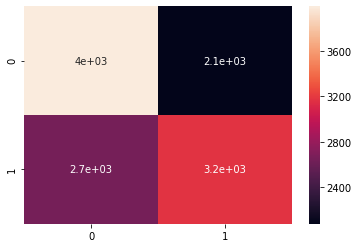

In [52]:
sns.heatmap(confusion_matrix(ytest,lr_pred),annot=True)

In [53]:
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63      6072
           1       0.60      0.54      0.57      5822

    accuracy                           0.60     11894
   macro avg       0.60      0.60      0.60     11894
weighted avg       0.60      0.60      0.60     11894



In [54]:
cohen_kappa_score(ytest,lr_pred)

0.20234533318571402

We are binning the target column on the basis of the minimum value, the median value and maximum value as our target column
is a regression problem as of now. We are going to drop the two non-predictive columns and the numerical column of target as we have converted it into a classification problem. We applied logistic regression model to start with to check its accuracy and it came out to be 60.215%. As we can see that the training accuracy is coming up as 60.039% and 60.215%.
As the training and testing accuracies are more or less the same, it means that the logistic regression model is neither over-fitting nor under-fitting. The F1 score is a harmonic mean of precision and recall. The F1 score for our class (0 - Unpopular Article(url)) is coming up to be 63% and for the class (1-Popular Article(url)) is coming up to be 57%. 
The cohen kappa score is coming up to be as 20.23%. The cohen kappa score is a measure of how closely the data points which are classified by the classifier are matched to the data in original data.

In [55]:
new_data = data.copy()
new_data["constant"] = 1

In [57]:
X = new_data.drop("Shares_Category",axis=1)
Y = new_data.Shares_Category

In [113]:
logit_model = sm.Logit(endog=Y,exog=X.drop(["n_tokens_title","n_unique_tokens","num_imgs","num_videos","n_non_stop_words","data_channel_is_world","self_reference_max_shares","self_reference_min_shares","weekday_is_saturday","weekday_is_monday","weekday_is_thursday","LDA_00","global_sentiment_polarity","global_sentiment_polarity","global_rate_negative_words","n_non_stop_unique_tokens","rate_positive_words","avg_positive_polarity","max_positive_polarity","max_positive_polarity","avg_negative_polarity","max_negative_polarity","min_negative_polarity","abs_title_sentiment_polarity"],axis=1),data=new_data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.628563
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Shares_Category   No. Observations:                39644
Model:                          Logit   Df Residuals:                    39607
Method:                           MLE   Df Model:                           36
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                 0.09306
Time:                        11:34:24   Log-Likelihood:                -24919.
converged:                       True   LL-Null:                       -27476.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_content                  0.0002   2.88e-05      7.624      0.000       0.000       0.000
num_hrefs                         0.0084      0.001      6.701      0.000       0.006       0.011
num_self_hrefs                   -0.0209      0.003     -6.308      0.000      -0.027      -0.014
average_token_length             -0.0910      0.019     -4.749      0.000      -0.129      -0.053
num_keywords                      0.0382      0.007      5.528      0.000       0.025       0.052
data_channel_is_lifestyle        -0.1674      0.062     -2.696      0.007      -0.289      -0.046
data_channel_is_entertainment    -0.3139      0.041     -7.586      0.000      -0.395      -0.233
data_channel_is_bus              -0.2643      0.059     -4.465      0.000      -0.380      -0.148
data_channel_is_socmed            0.7568      0.059     12.884      0.000       0.642       0.872
data_channel_is_tech              0.4658      0.052      8.940      0.000       0.364       0.568
kw_min_min                        0.0017      0.000      5.533      0.000       0.001       0.002
kw_max_min                     2.763e-05   1.15e-05      2.399      0.016    5.06e-06    5.02e-05
kw_avg_min                       -0.0002   7.34e-05     -2.707      0.007      -0.000   -5.48e-05
kw_min_max                    -5.355e-07   2.13e-07     -2.511      0.012   -9.53e-07   -1.18e-07
kw_max_max                    -3.511e-07   1.08e-07     -3.259      0.001   -5.62e-07    -1.4e-07
kw_avg_max                    -6.638e-07   1.52e-07     -4.371      0.000   -9.62e-07   -3.66e-07
kw_min_avg                    -8.764e-05   1.44e-05     -6.105      0.000      -0.000   -5.95e-05
kw_max_avg                    -8.863e-05   4.96e-06    -17.854      0.000   -9.84e-05   -7.89e-05
kw_avg_avg                        0.0007   2.82e-05     25.347      0.000       0.001       0.001
self_reference_avg_sharess     4.504e-06   6.69e-07      6.733      0.000    3.19e-06    5.81e-06
weekday_is_tuesday               -0.0917      0.031     -3.002      0.003      -0.152      -0.032
weekday_is_wednesday             -0.0913      0.031     -2.993      0.003      -0.151      -0.032
weekday_is_friday                 0.1386      0.033      4.162      0.000       0.073       0.204
weekday_is_sunday                -0.2233      0.063     -3.559      0.000      -0.346      -0.100
is_weekend                        0.9356      0.050     18.706      0.000       0.838       1.034
LDA_01                           -1.1026      0.095    -11.568      0.000      -1.289      -0.916
LDA_02                           -1.2531      0.089    -14.143      0.000      -1.427      -1.079
LDA_03                           -1.0652      0.089    -12.028      0.000      -1.239      -0.892
LDA_04                           -0.5870      0.085     -6.914      0.000      -0.753      -0.421
global_subjectivity               0.9484      0.136      6.977      0.000       0.682       1.215
global_

I started the Logit model with all the attributes and after applying a feature selection technique(backward elimination), i got down to 36 attributes. I eliminated the columns on the basis of the p-value. I deleted the column one by one on the basis of p-value. I kep the attributes which had a p-value of less than 0.05. 0.05 is the alpha here.

### Q4A. Check for Outlier using Box plot and apply the formula to check how many of these data has outliers
### AND
### Q4D. Apply density plot and check if the data is normally distributed

I am going to merge both A and D questions as both of the parts of the  come under Univariate Analysis of EDA.

In [162]:
new_data_1 = data.copy()

In [163]:
new_data_1.drop(['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity',"Shares_Category"],inplace=True,axis=1)

In [164]:
column = new_data_1.columns

In [165]:
def outliers(column):
    IQR=column.quantile(0.75)-column.quantile(0.25)
    UL=column.quantile(0.75)+1.5*IQR
    LL=column.quantile(0.25)-1.5*IQR
    column.where(column.between(LL,UL),np.nan,inplace=True)

In [166]:
for i in new_data_1.columns:
    outliers(new_data_1[i])

In [167]:
new_data_1.isnull().sum() # These number of outliers are present in each attribute.

n_tokens_title                 156
n_tokens_content              1933
n_unique_tokens               1604
n_non_stop_words              2827
n_non_stop_unique_tokens      1733
num_hrefs                     2169
num_self_hrefs                2090
num_imgs                      7703
num_videos                    2946
average_token_length          1681
num_keywords                    51
kw_min_min                    4677
kw_max_min                    3661
kw_avg_min                    2081
kw_min_max                    5063
kw_max_max                    9440
kw_avg_max                     960
kw_min_avg                       0
kw_max_avg                    2391
kw_avg_avg                    1629
self_reference_min_shares     4976
self_reference_max_shares     4183
self_reference_avg_sharess    4209
dtype: int64

#### Univariate Analysis

For Numerical Columns I created distplots(to visualise the distribution of the feature) and boxplots(to visualise the outliers).
For Categorical Columns I created Countplots as there is no point in showing distplots for them. 

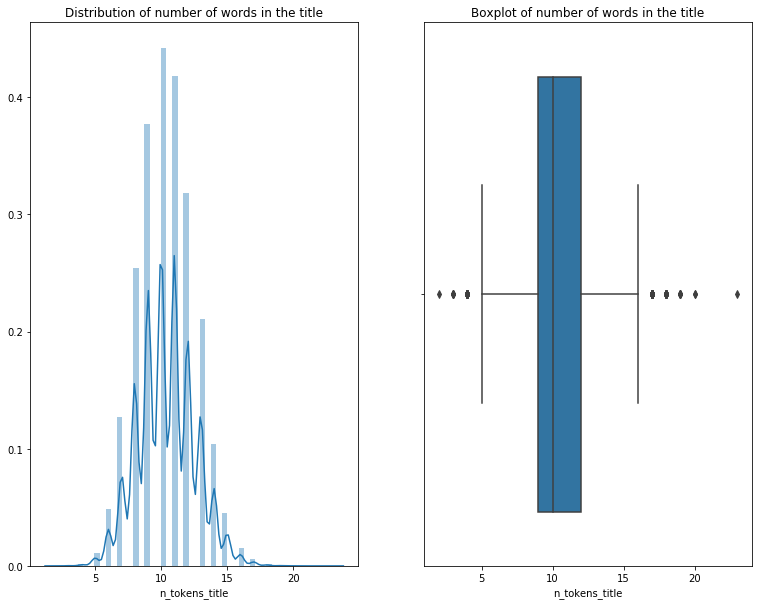

In [163]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_tokens_title)
plt.title("Distribution of number of words in the title")
plt.subplot(132)
sns.boxplot(data.n_tokens_title)
plt.title("Boxplot of number of words in the title")
plt.show()

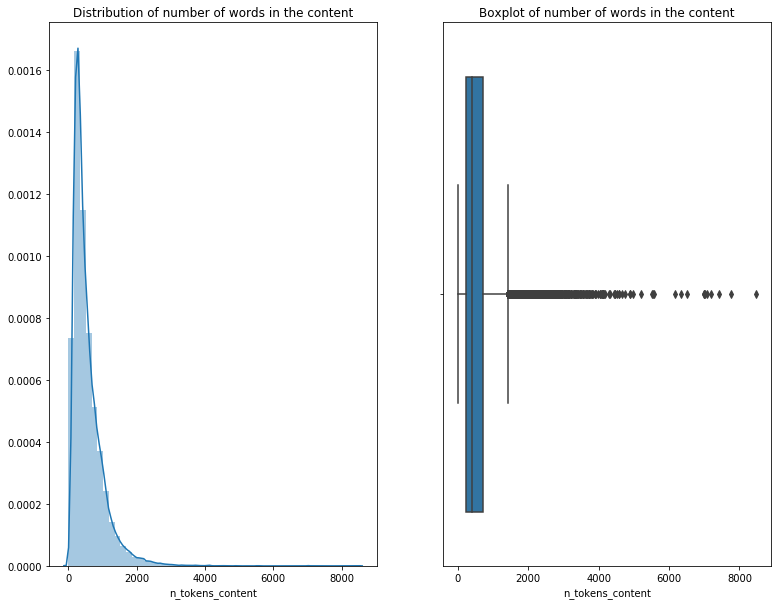

In [164]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_tokens_content)
plt.title("Distribution of number of words in the content")
plt.subplot(132)
sns.boxplot(data.n_tokens_content)
plt.title("Boxplot of number of words in the content")
plt.show()

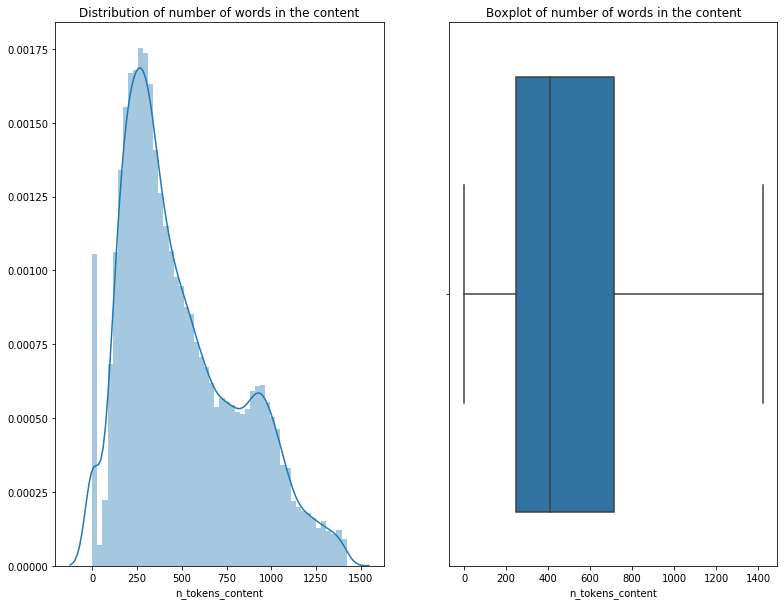

In [192]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(df.n_tokens_content)
plt.title("Distribution of number of words in the content")
plt.subplot(132)
sns.boxplot(df.n_tokens_content)
plt.title("Boxplot of number of words in the content")
plt.show()

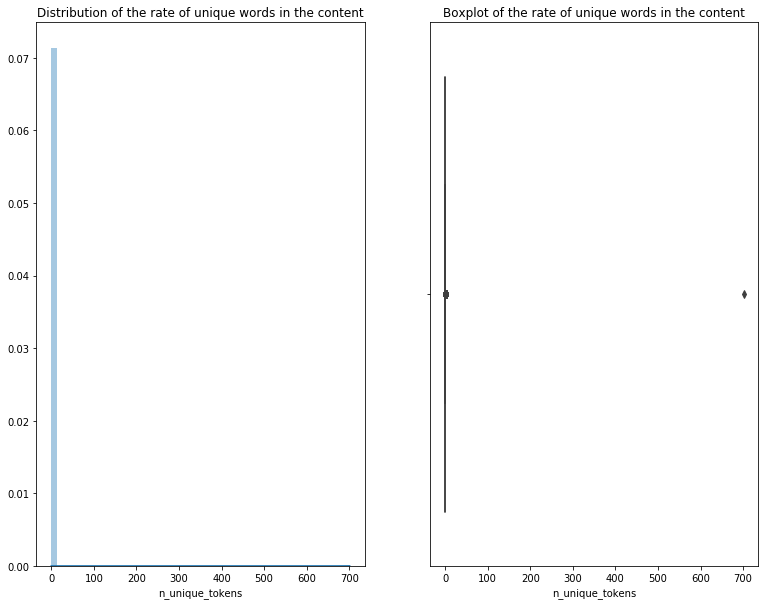

In [165]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_unique_tokens)
plt.title("Distribution of the rate of unique words in the content")
plt.subplot(132)
sns.boxplot(data.n_unique_tokens)
plt.title("Boxplot of the rate of unique words in the content")
plt.show()

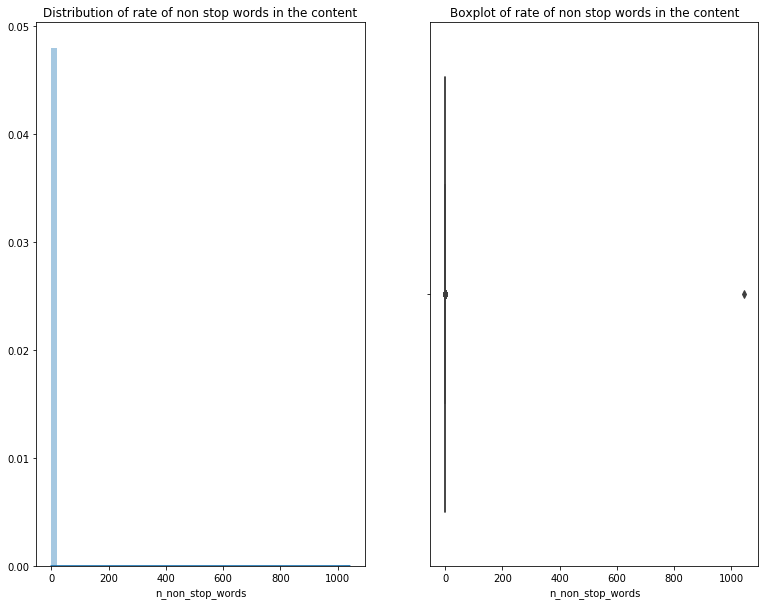

In [166]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_non_stop_words)
plt.title("Distribution of rate of non stop words in the content")
plt.subplot(132)
sns.boxplot(data.n_non_stop_words)
plt.title("Boxplot of rate of non stop words in the content")
plt.show()

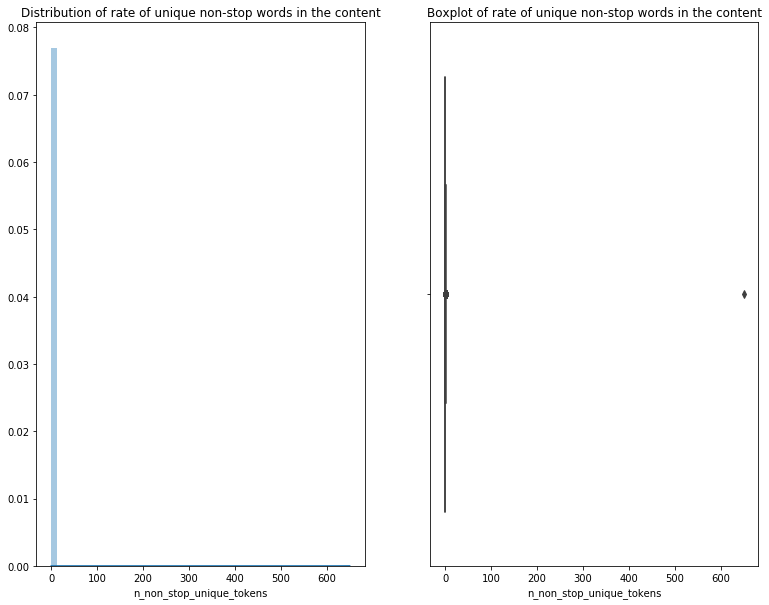

In [167]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.n_non_stop_unique_tokens)
plt.title("Distribution of rate of unique non-stop words in the content")
plt.subplot(132)
sns.boxplot(data.n_non_stop_unique_tokens)
plt.title("Boxplot of rate of unique non-stop words in the content")
plt.show()

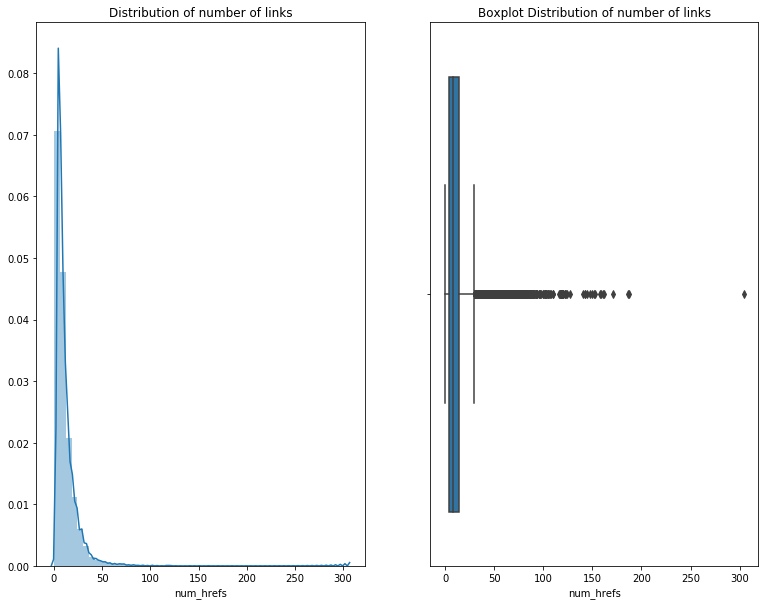

In [168]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_hrefs)
plt.title("Distribution of number of links")
plt.subplot(132)
sns.boxplot(data.num_hrefs)
plt.title("Boxplot Distribution of number of links")
plt.show()

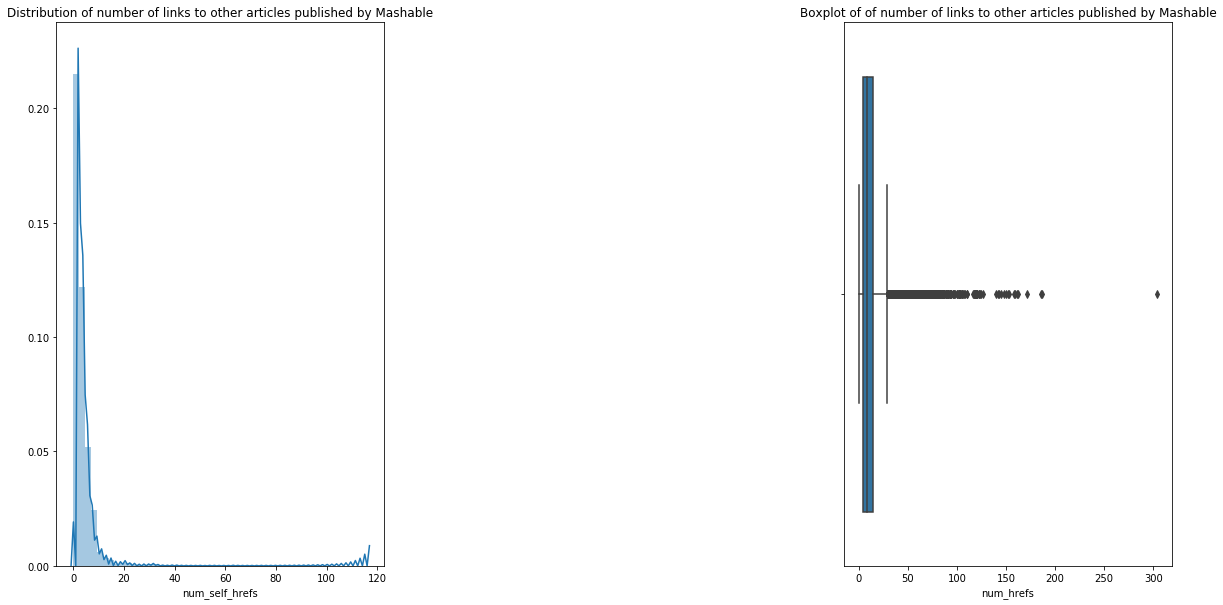

In [171]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_self_hrefs)
plt.title("Distribution of number of links to other articles published by Mashable")
plt.subplot(133)
sns.boxplot(data.num_hrefs)
plt.title("Boxplot of of number of links to other articles published by Mashable")
plt.show()

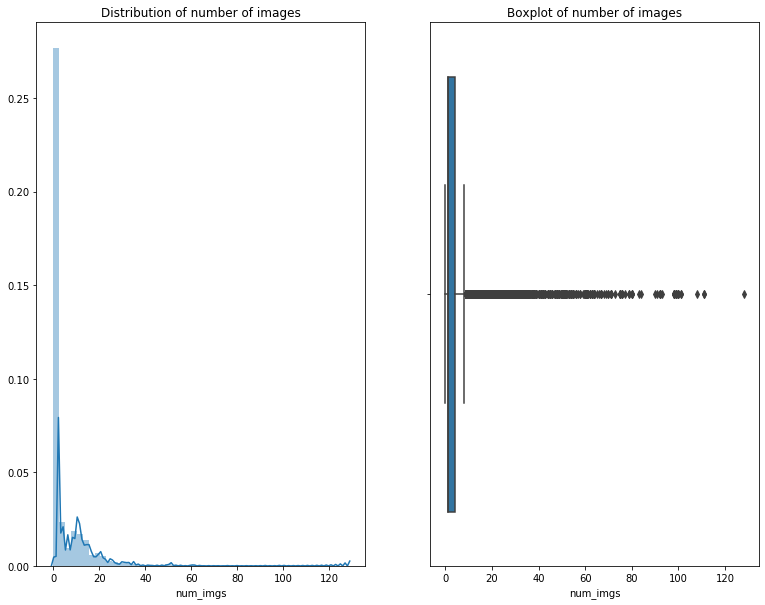

In [174]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_imgs)
plt.title("Distribution of number of images")
plt.subplot(132)
sns.boxplot(data.num_imgs)
plt.title("Boxplot of number of images")
plt.show()

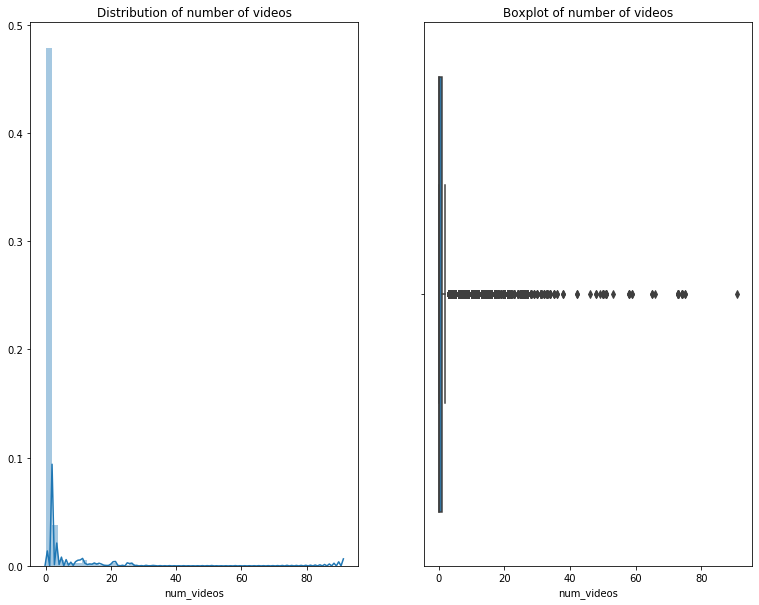

In [175]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_videos)
plt.title("Distribution of number of videos")
plt.subplot(132)
sns.boxplot(data.num_videos)
plt.title("Boxplot of number of videos")
plt.show()

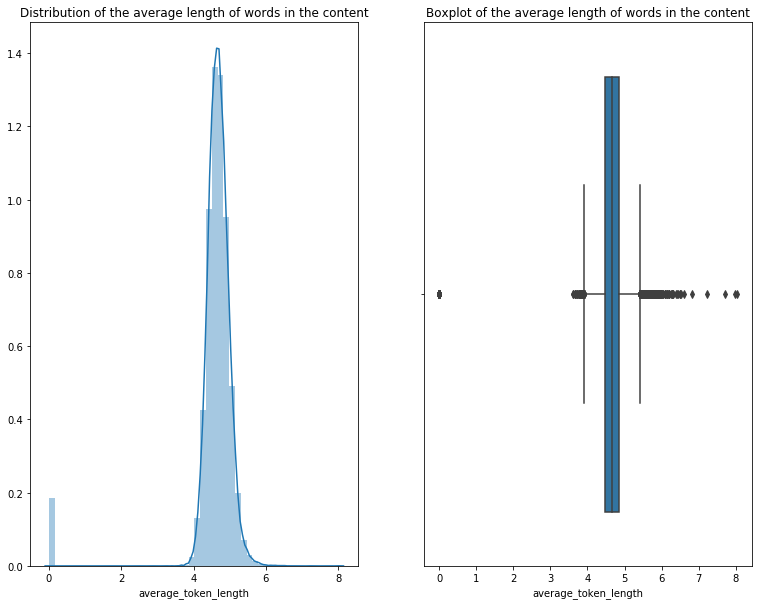

In [177]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.average_token_length)
plt.title("Distribution of the average length of words in the content")
plt.subplot(132)
sns.boxplot(data.average_token_length)
plt.title("Boxplot of the average length of words in the content")
plt.show()

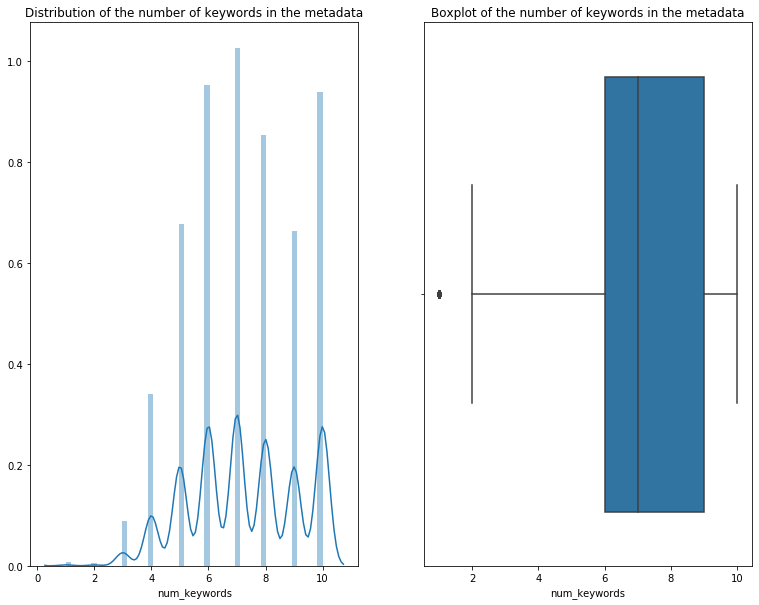

In [178]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.num_keywords)
plt.title("Distribution of the number of keywords in the metadata")
plt.subplot(132)
sns.boxplot(data.num_keywords)
plt.title("Boxplot of the number of keywords in the metadata")
plt.show()

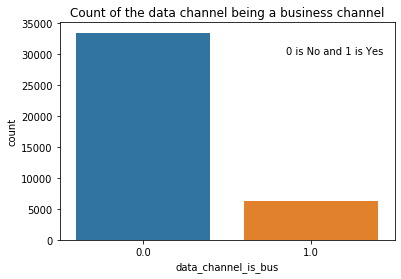

In [75]:
sns.countplot(data.data_channel_is_bus)
plt.title("Count of the data channel being a business channel")
plt.text(.85,30000,"0 is No and 1 is Yes")
plt.show()

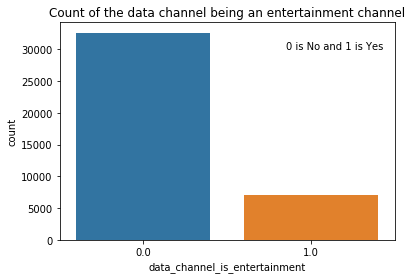

In [76]:
sns.countplot(data.data_channel_is_entertainment)
plt.title("Count of the data channel being an entertainment channel")
plt.text(.85,30000,"0 is No and 1 is Yes")
plt.show()

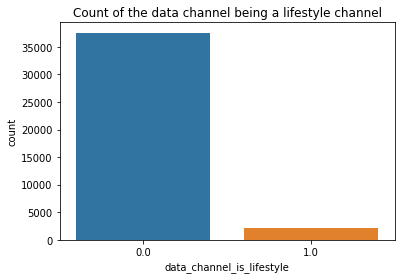

In [77]:
sns.countplot(data.data_channel_is_lifestyle)
plt.title("Count of the data channel being a lifestyle channel")
plt.show()

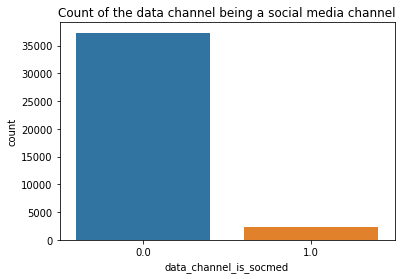

In [78]:
sns.countplot(data.data_channel_is_socmed)
plt.title("Count of the data channel being a social media channel")
plt.show()

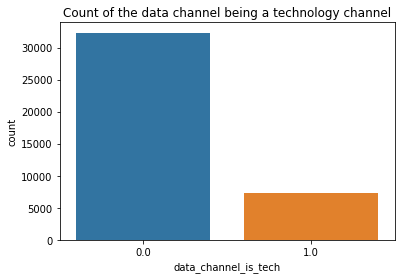

In [79]:
sns.countplot(data.data_channel_is_tech)
plt.title("Count of the data channel being a technology channel")
plt.show()

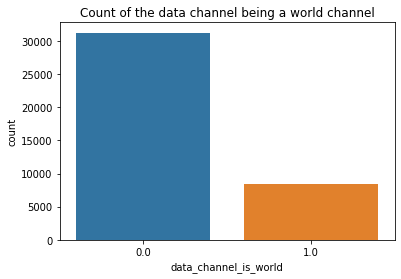

In [80]:
sns.countplot(data.data_channel_is_world)
plt.title("Count of the data channel being a world channel")
plt.show()

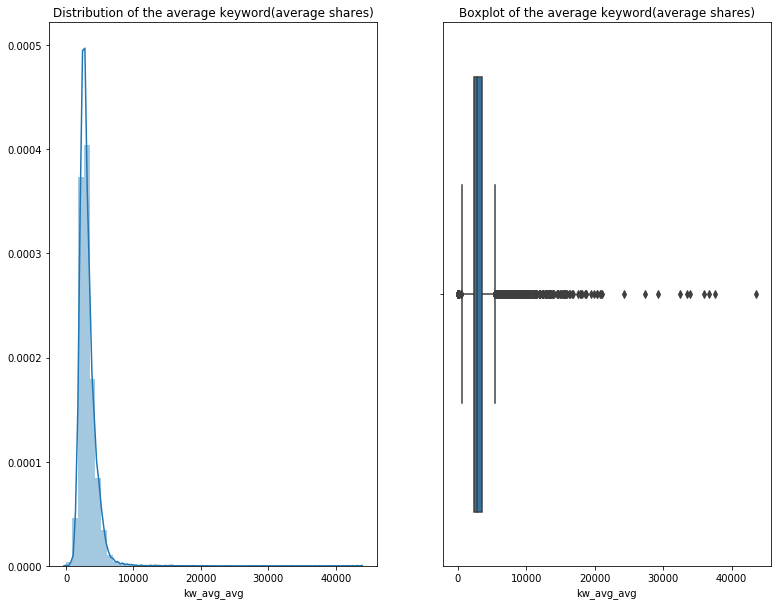

In [179]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_avg_avg)
plt.title("Distribution of the average keyword(average shares)")
plt.subplot(132)
sns.boxplot(data.kw_avg_avg)
plt.title("Boxplot of the average keyword(average shares)")
plt.show()

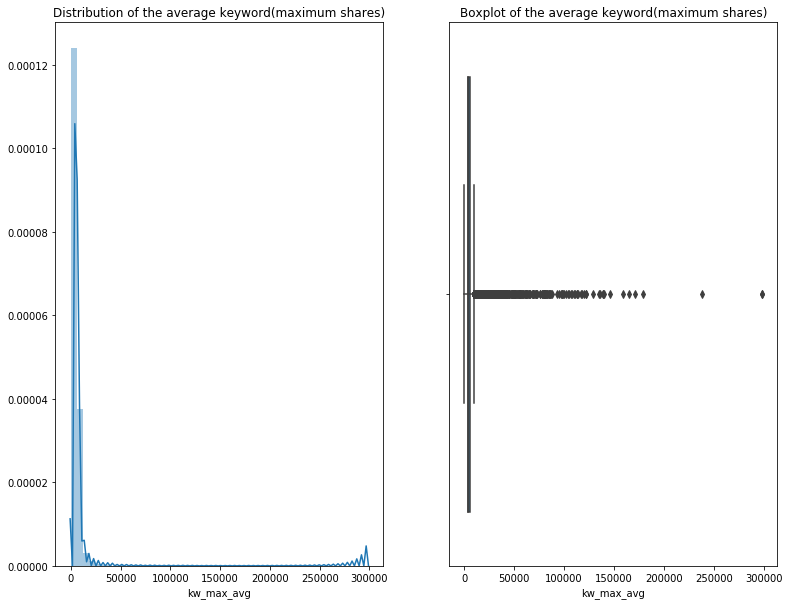

In [180]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_max_avg)
plt.title("Distribution of the average keyword(maximum shares)")
plt.subplot(132)
sns.boxplot(data.kw_max_avg)
plt.title("Boxplot of the average keyword(maximum shares)")
plt.show()

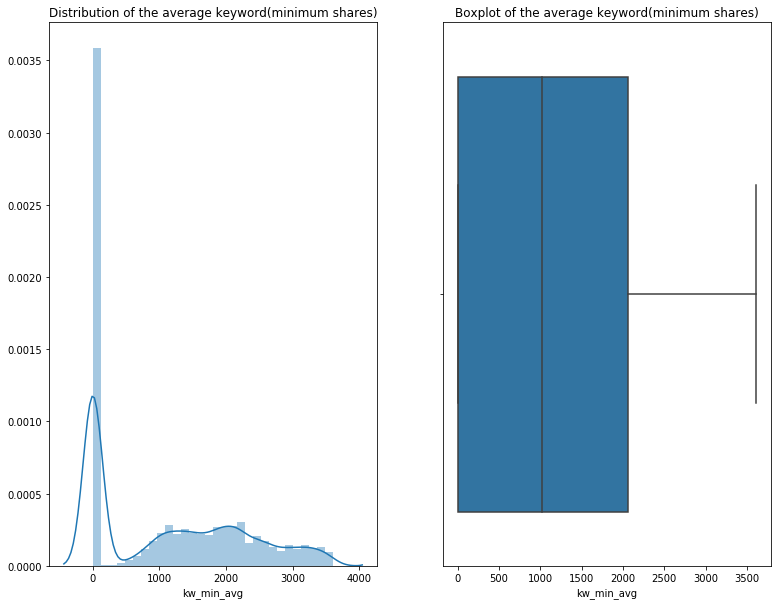

In [181]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_min_avg)
plt.title("Distribution of the average keyword(minimum shares)")
plt.subplot(132)
sns.boxplot(data.kw_min_avg)
plt.title("Boxplot of the average keyword(minimum shares)")
plt.show()

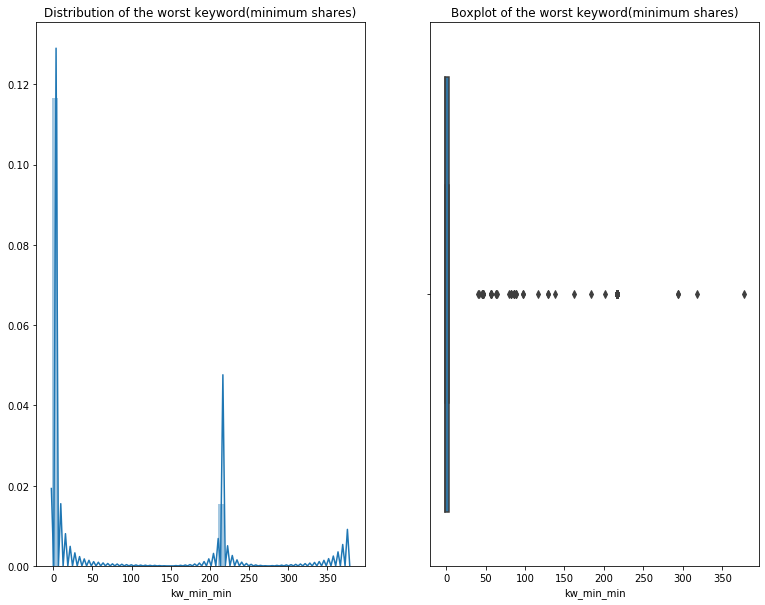

In [182]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_min_min)
plt.title("Distribution of the worst keyword(minimum shares)")
plt.subplot(132)
sns.boxplot(data.kw_min_min)
plt.title("Boxplot of the worst keyword(minimum shares)")
plt.show()

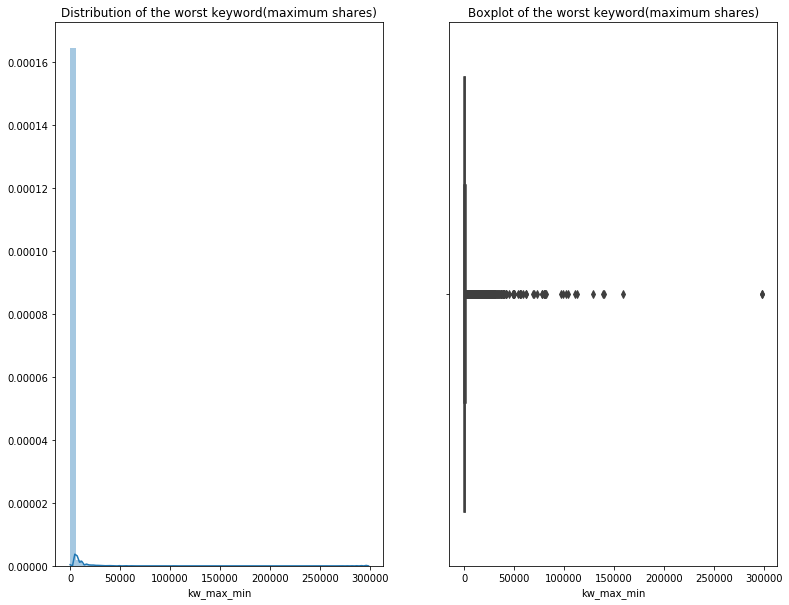

In [183]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_max_min)
plt.title("Distribution of the worst keyword(maximum shares)")
plt.subplot(132)
sns.boxplot(data.kw_max_min)
plt.title("Boxplot of the worst keyword(maximum shares)")
plt.show()

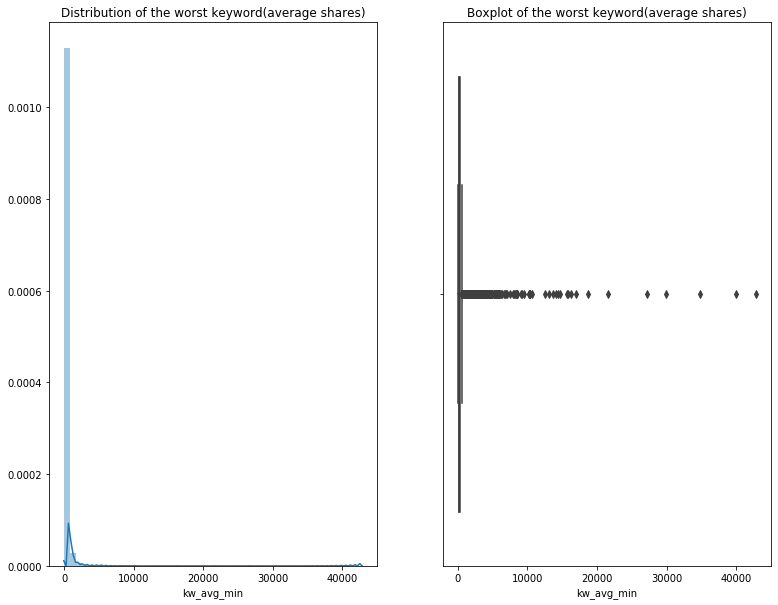

In [184]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_avg_min)
plt.title("Distribution of the worst keyword(average shares)")
plt.subplot(132)
sns.boxplot(data.kw_avg_min)
plt.title("Boxplot of the worst keyword(average shares)")
plt.show()

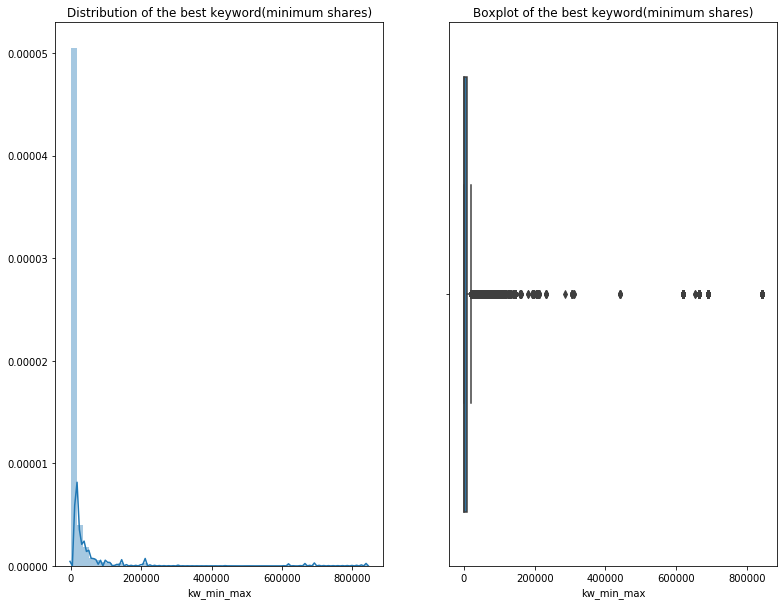

In [185]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_min_max)
plt.title("Distribution of the best keyword(minimum shares)")
plt.subplot(132)
sns.boxplot(data.kw_min_max)
plt.title("Boxplot of the best keyword(minimum shares)")
plt.show()

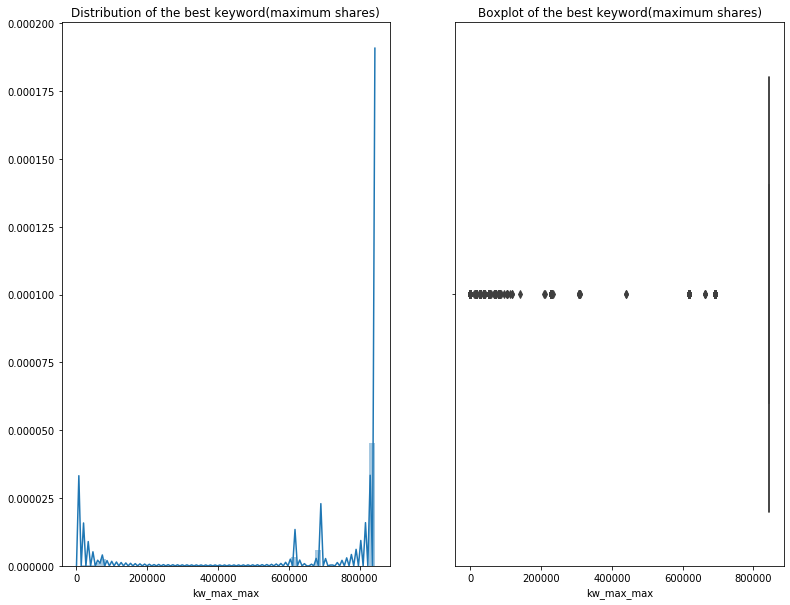

In [186]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_max_max)
plt.title("Distribution of the best keyword(maximum shares)")
plt.subplot(132)
sns.boxplot(data.kw_max_max)
plt.title("Boxplot of the best keyword(maximum shares)")
plt.show()

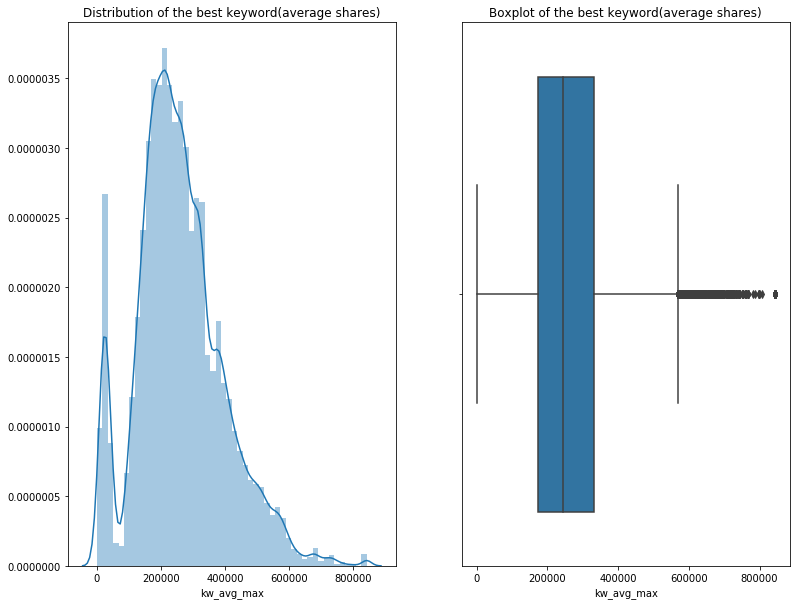

In [187]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.kw_avg_max)
plt.title("Distribution of the best keyword(average shares)")
plt.subplot(132)
sns.boxplot(data.kw_avg_max)
plt.title("Boxplot of the best keyword(average shares)")
plt.show()

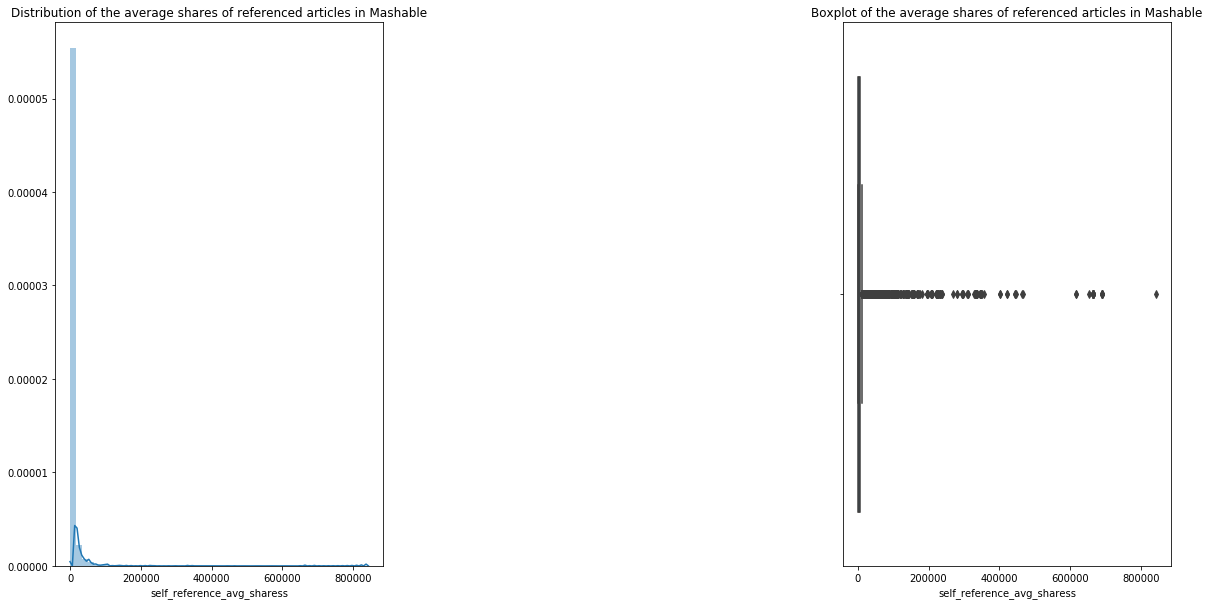

In [189]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.self_reference_avg_sharess)
plt.title("Distribution of the average shares of referenced articles in Mashable")
plt.subplot(133)
sns.boxplot(data.self_reference_avg_sharess)
plt.title("Boxplot of the average shares of referenced articles in Mashable")
plt.show()

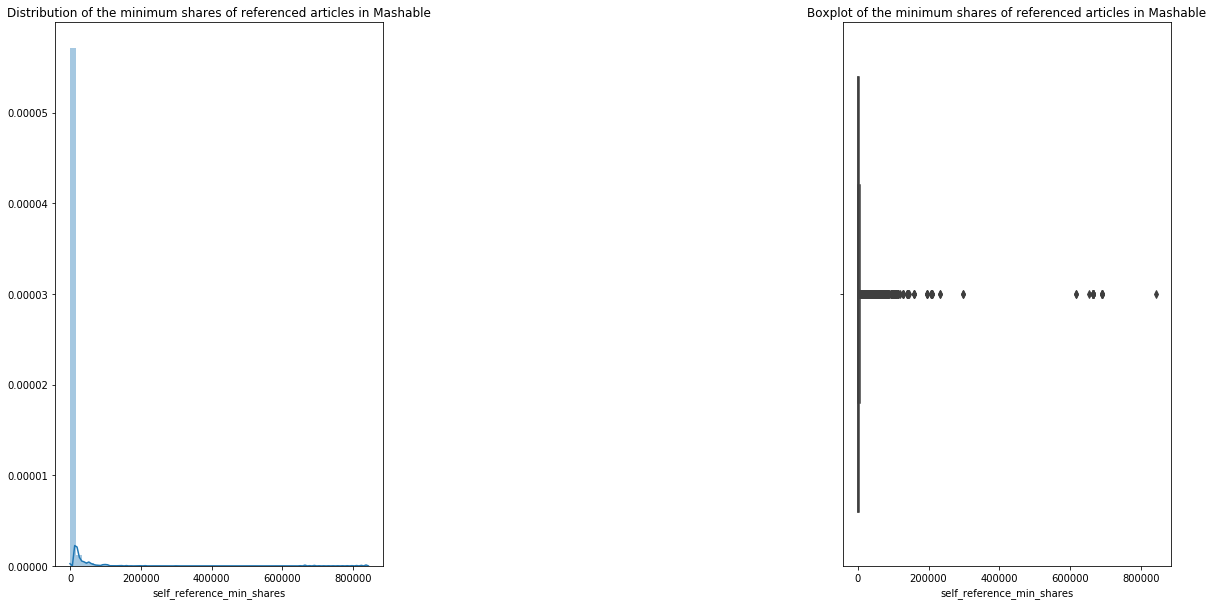

In [190]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.self_reference_min_shares)
plt.title("Distribution of the minimum shares of referenced articles in Mashable")
plt.subplot(133)
sns.boxplot(data.self_reference_min_shares)
plt.title("Boxplot of the minimum shares of referenced articles in Mashable")
plt.show()

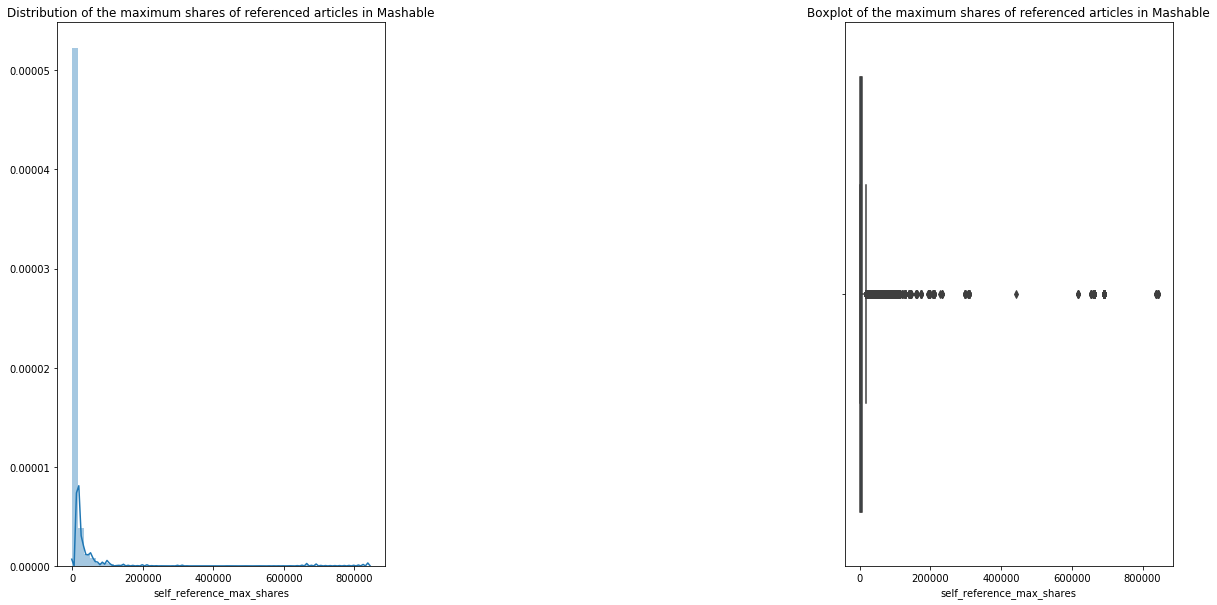

In [191]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.self_reference_max_shares)
plt.title("Distribution of the maximum shares of referenced articles in Mashable")
plt.subplot(133)
sns.boxplot(data.self_reference_max_shares)
plt.title("Boxplot of the maximum shares of referenced articles in Mashable")
plt.show()

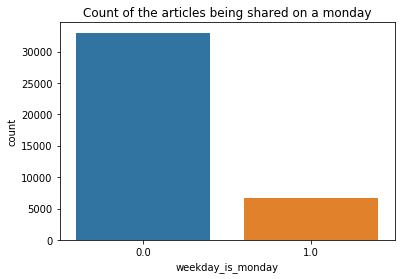

In [93]:
sns.countplot(data.weekday_is_monday)
plt.title("Count of the articles being shared on a monday")
plt.show()

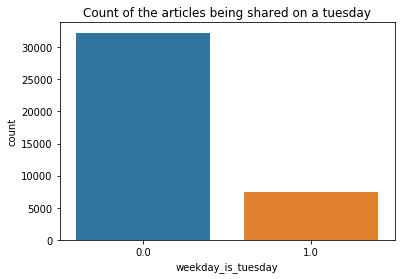

In [94]:
sns.countplot(data.weekday_is_tuesday)
plt.title("Count of the articles being shared on a tuesday")
plt.show()

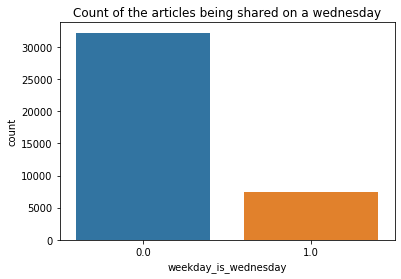

In [95]:
sns.countplot(data.weekday_is_wednesday)
plt.title("Count of the articles being shared on a wednesday")
plt.show()

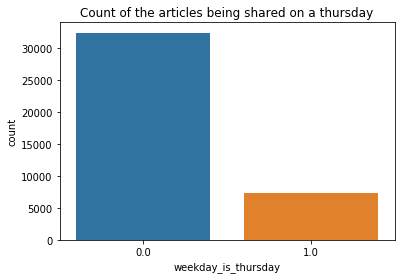

In [96]:
sns.countplot(data.weekday_is_thursday)
plt.title("Count of the articles being shared on a thursday")
plt.show()

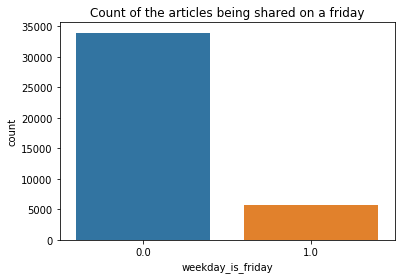

In [97]:
sns.countplot(data.weekday_is_friday)
plt.title("Count of the articles being shared on a friday")
plt.show()

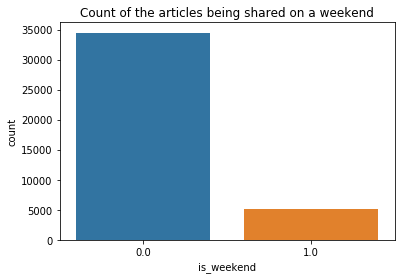

In [98]:
sns.countplot(data.is_weekend)
plt.title("Count of the articles being shared on a weekend")
plt.show()

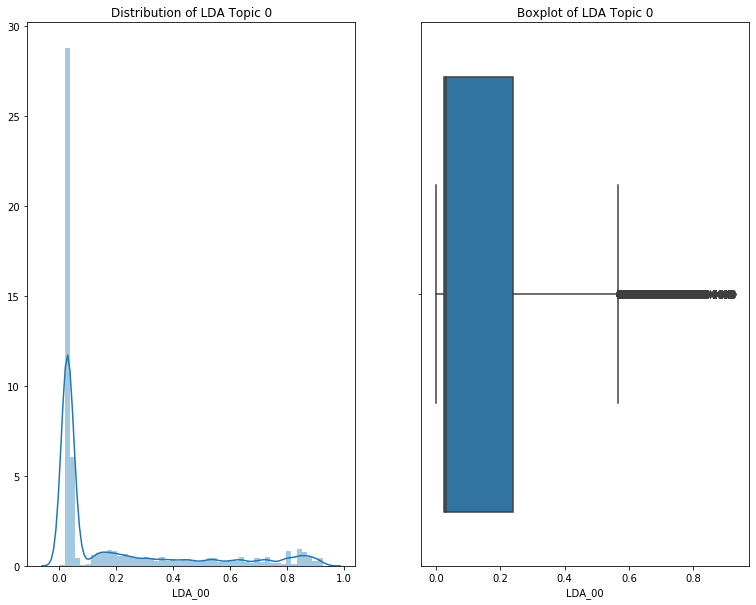

In [192]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_00)
plt.title("Distribution of LDA Topic 0")
plt.subplot(132)
sns.boxplot(data.LDA_00)
plt.title("Boxplot of LDA Topic 0")
plt.show()

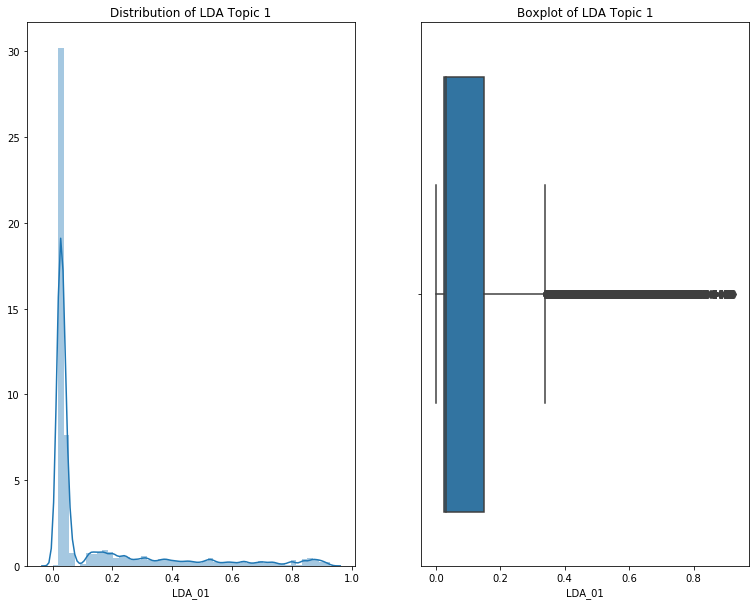

In [193]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_01)
plt.title("Distribution of LDA Topic 1")
plt.subplot(132)
sns.boxplot(data.LDA_01)
plt.title("Boxplot of LDA Topic 1")
plt.show()

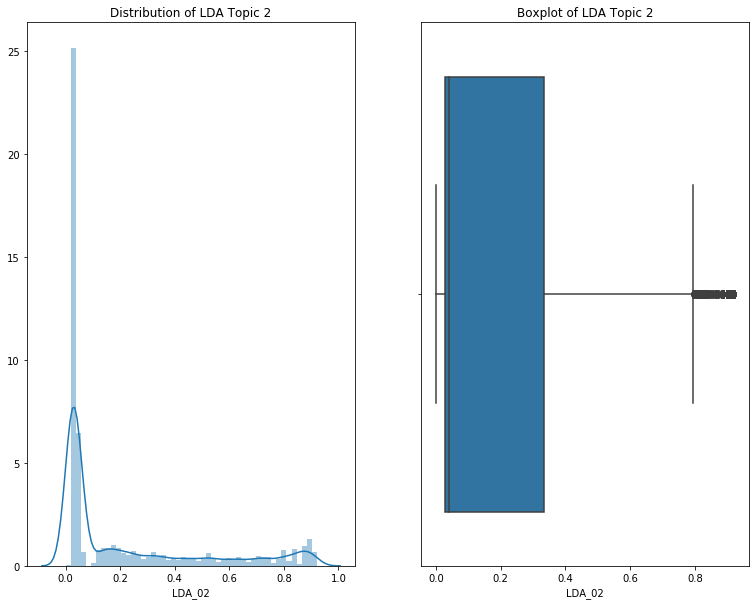

In [194]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_02)
plt.title("Distribution of LDA Topic 2")
plt.subplot(132)
sns.boxplot(data.LDA_02)
plt.title("Boxplot of LDA Topic 2")
plt.show()

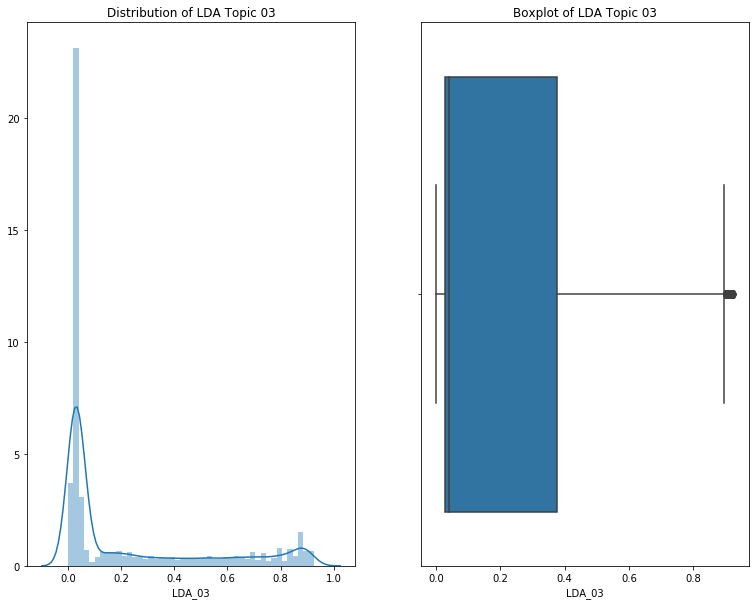

In [195]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_03)
plt.title("Distribution of LDA Topic 03")
plt.subplot(132)
sns.boxplot(data.LDA_03)
plt.title("Boxplot of LDA Topic 03")
plt.show()

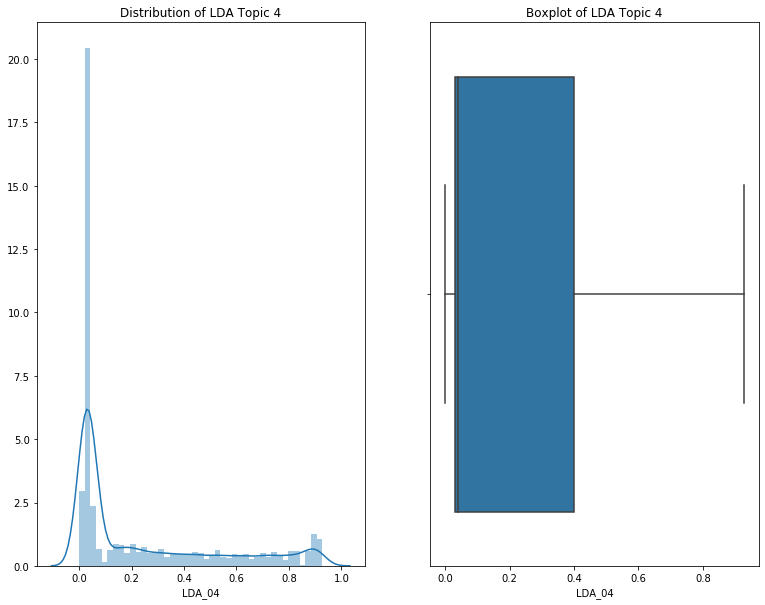

In [196]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.LDA_04)
plt.title("Distribution of LDA Topic 4")
plt.subplot(132)
sns.boxplot(data.LDA_04)
plt.title("Boxplot of LDA Topic 4")
plt.show()

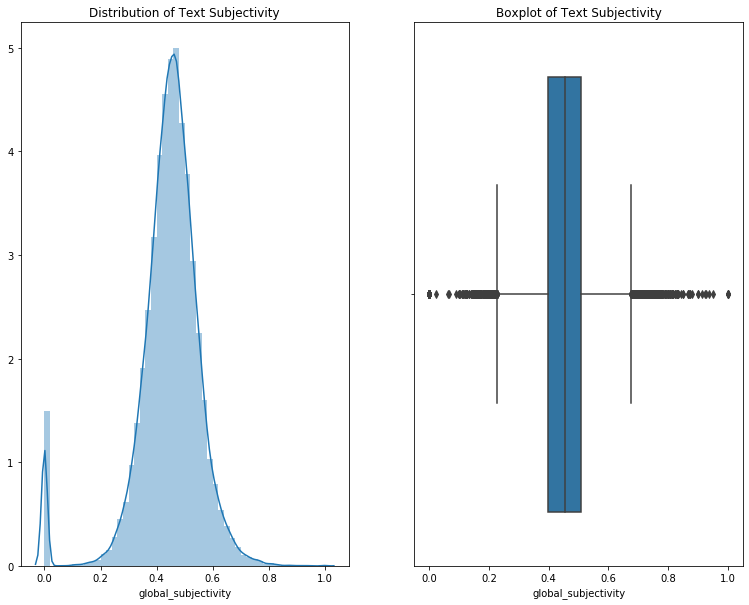

In [197]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.global_subjectivity)
plt.title("Distribution of Text Subjectivity")
plt.subplot(132)
sns.boxplot(data.global_subjectivity)
plt.title("Boxplot of Text Subjectivity")
plt.show()

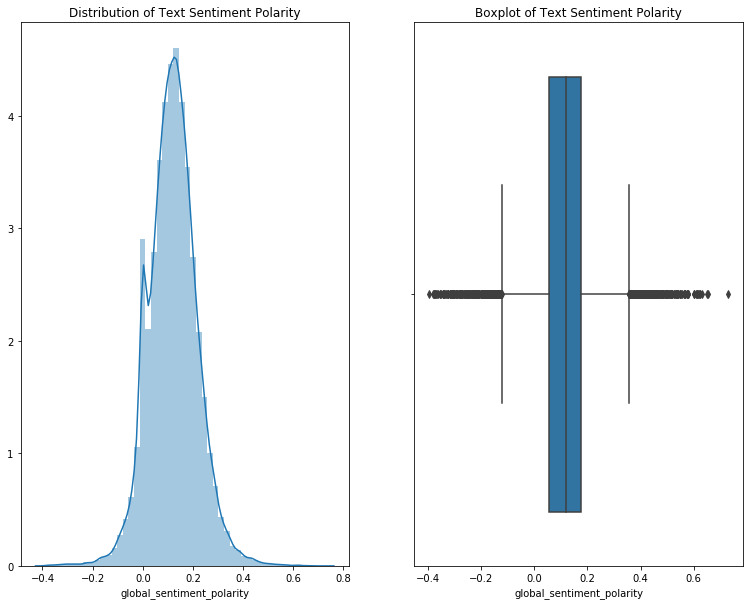

In [198]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.global_sentiment_polarity)
plt.title("Distribution of Text Sentiment Polarity")
plt.subplot(132)
sns.boxplot(data.global_sentiment_polarity)
plt.title("Boxplot of Text Sentiment Polarity")
plt.show()

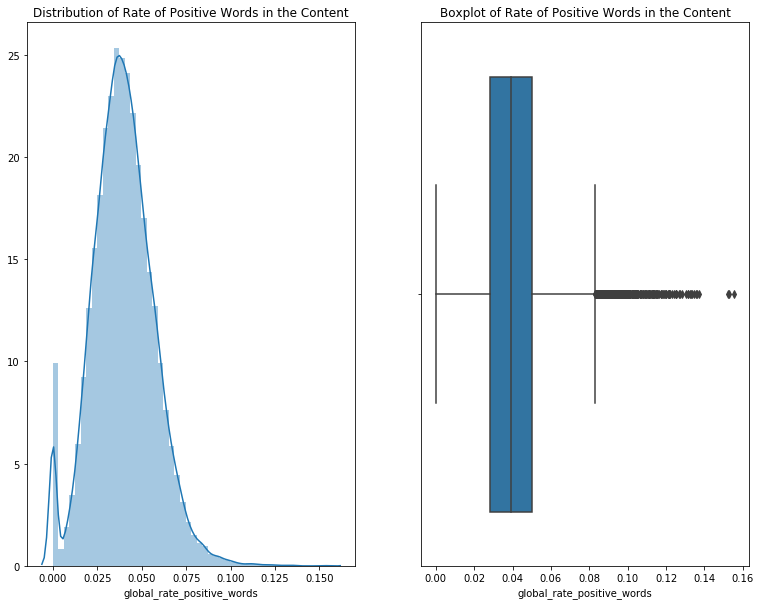

In [199]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.global_rate_positive_words)
plt.title("Distribution of Rate of Positive Words in the Content")
plt.subplot(132)
sns.boxplot(data.global_rate_positive_words)
plt.title("Boxplot of Rate of Positive Words in the Content")
plt.show()

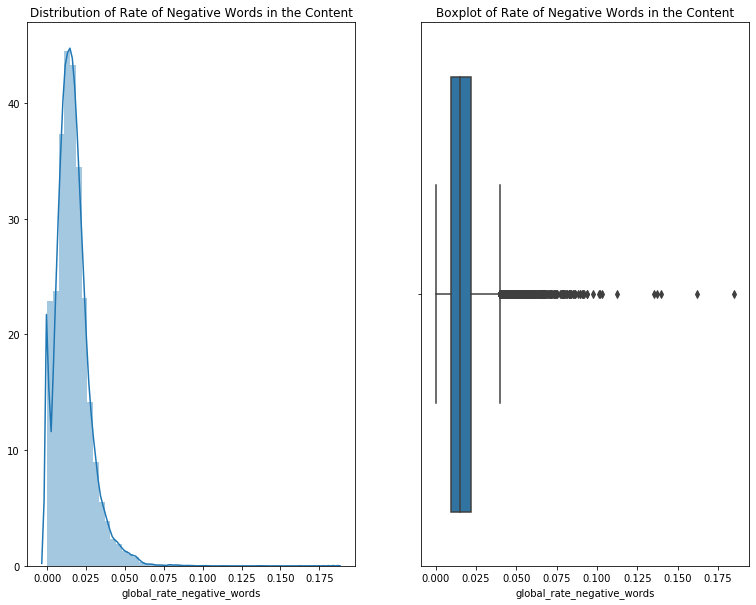

In [200]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.global_rate_negative_words)
plt.title("Distribution of Rate of Negative Words in the Content")
plt.subplot(132)
sns.boxplot(data.global_rate_negative_words)
plt.title("Boxplot of Rate of Negative Words in the Content")
plt.show()

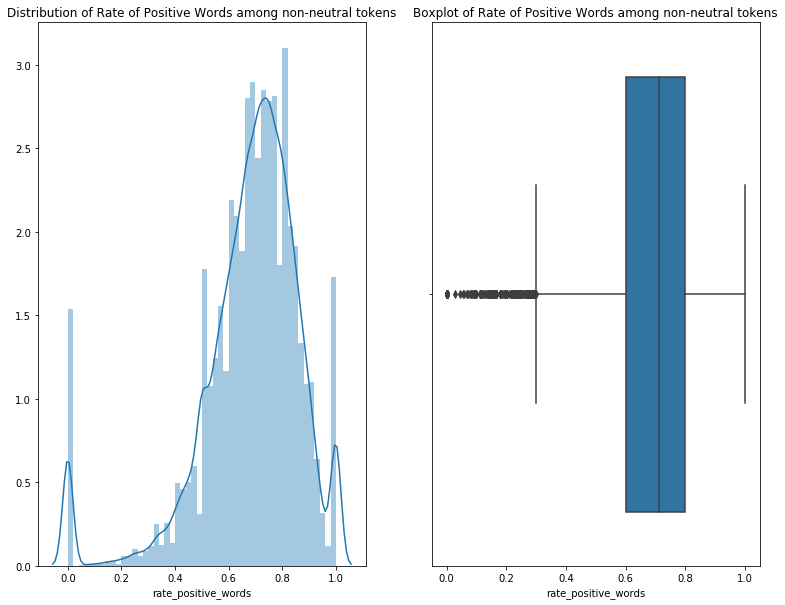

In [201]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.rate_positive_words)
plt.title("Distribution of Rate of Positive Words among non-neutral tokens")
plt.subplot(132)
sns.boxplot(data.rate_positive_words)
plt.title("Boxplot of Rate of Positive Words among non-neutral tokens")
plt.show()

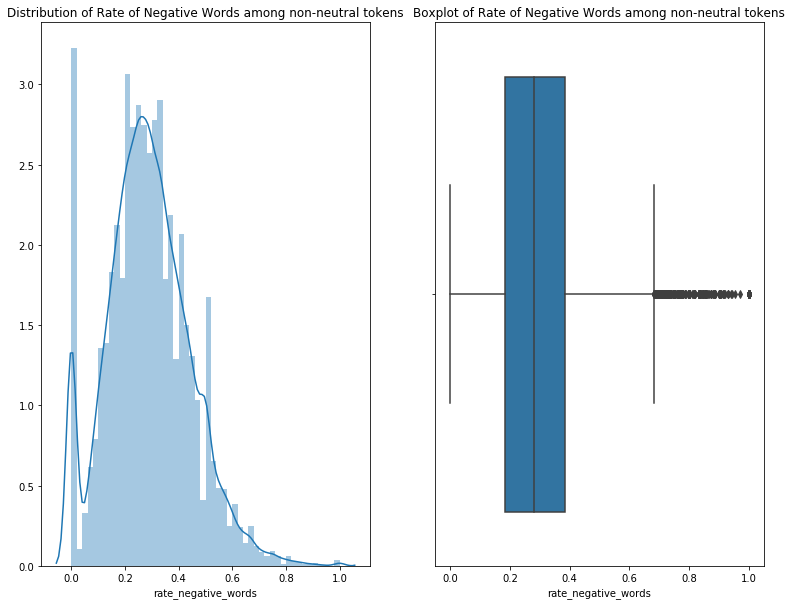

In [202]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.rate_negative_words)
plt.title("Distribution of Rate of Negative Words among non-neutral tokens")
plt.subplot(132)
sns.boxplot(data.rate_negative_words)
plt.title("Boxplot of Rate of Negative Words among non-neutral tokens")
plt.show()

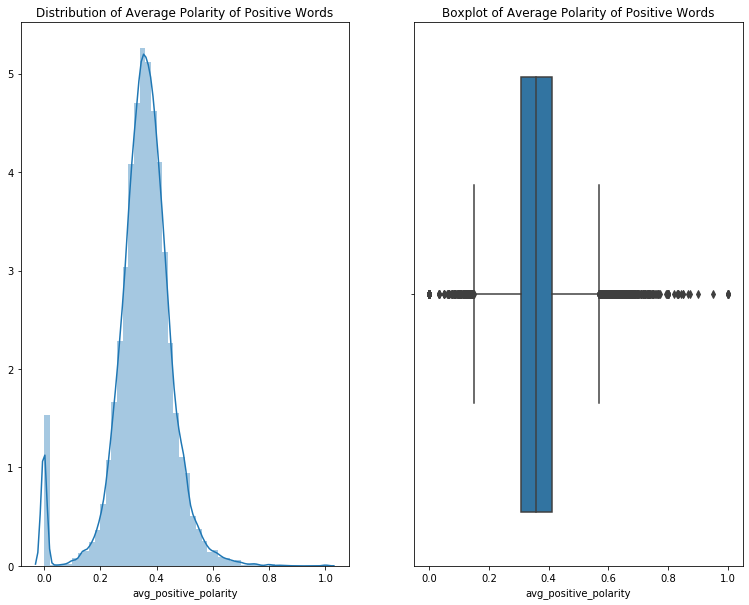

In [203]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.avg_positive_polarity)
plt.title("Distribution of Average Polarity of Positive Words")
plt.subplot(132)
sns.boxplot(data.avg_positive_polarity)
plt.title("Boxplot of Average Polarity of Positive Words")
plt.show()

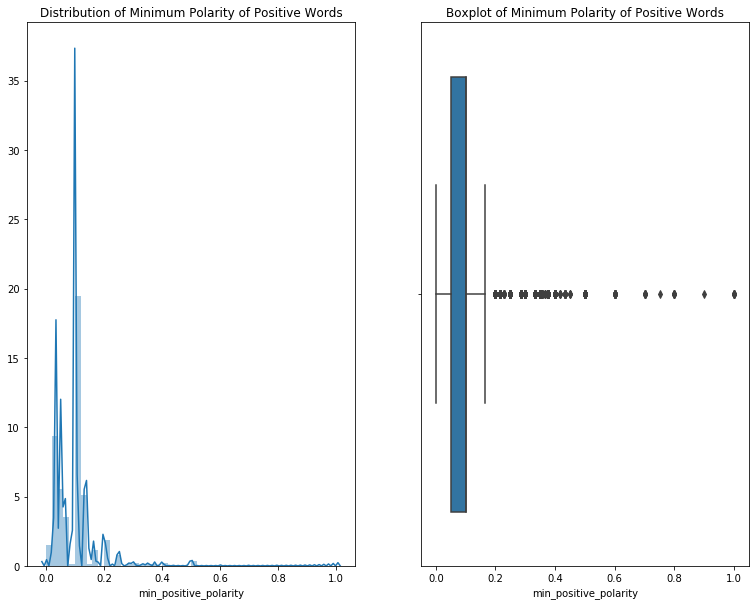

In [204]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.min_positive_polarity)
plt.title("Distribution of Minimum Polarity of Positive Words")
plt.subplot(132)
sns.boxplot(data.min_positive_polarity)
plt.title("Boxplot of Minimum Polarity of Positive Words")
plt.show()

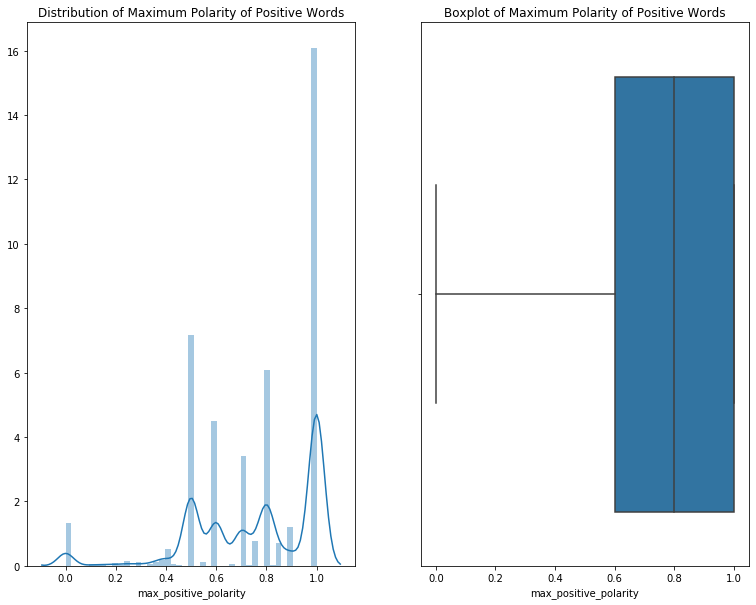

In [206]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.max_positive_polarity)
plt.title("Distribution of Maximum Polarity of Positive Words")
plt.subplot(132)
sns.boxplot(data.max_positive_polarity)
plt.title("Boxplot of Maximum Polarity of Positive Words")
plt.show()

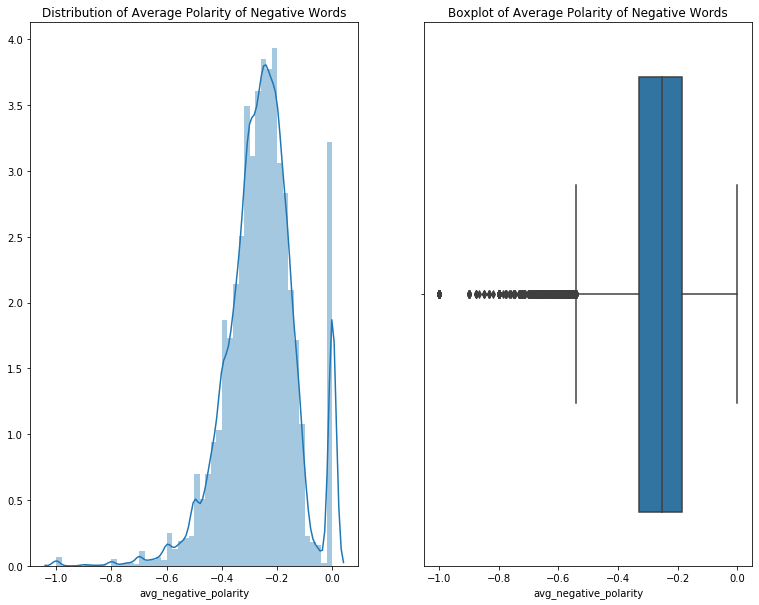

In [207]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.avg_negative_polarity)
plt.title("Distribution of Average Polarity of Negative Words")
plt.subplot(132)
sns.boxplot(data.avg_negative_polarity)
plt.title("Boxplot of Average Polarity of Negative Words")
plt.show()

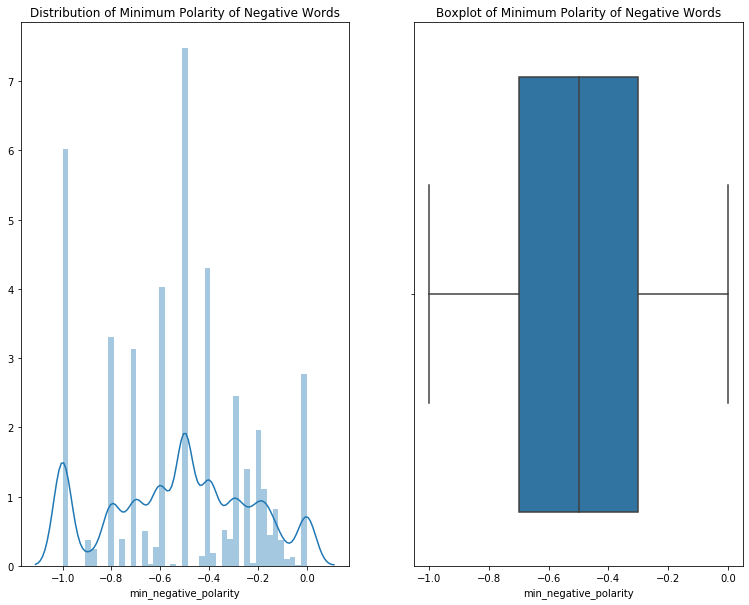

In [208]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.min_negative_polarity)
plt.title("Distribution of Minimum Polarity of Negative Words")
plt.subplot(132)
sns.boxplot(data.min_negative_polarity)
plt.title("Boxplot of Minimum Polarity of Negative Words")
plt.show()

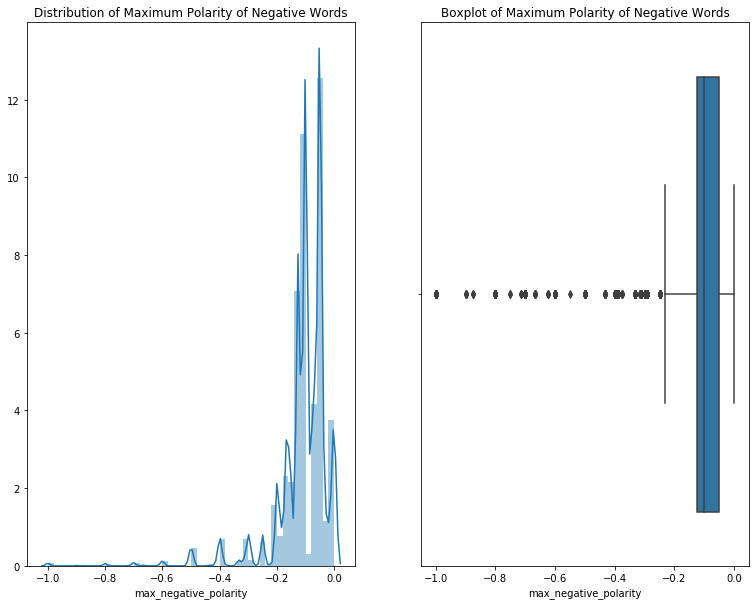

In [209]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.max_negative_polarity)
plt.title("Distribution of Maximum Polarity of Negative Words")
plt.subplot(132)
sns.boxplot(data.max_negative_polarity)
plt.title("Boxplot of Maximum Polarity of Negative Words")
plt.show()

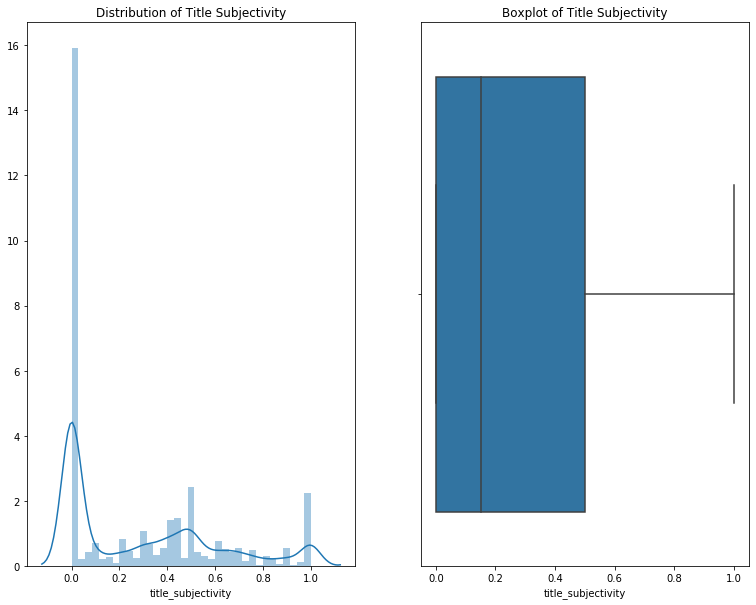

In [210]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.title_subjectivity)
plt.title("Distribution of Title Subjectivity")
plt.subplot(132)
sns.boxplot(data.title_subjectivity)
plt.title("Boxplot of Title Subjectivity")
plt.show()

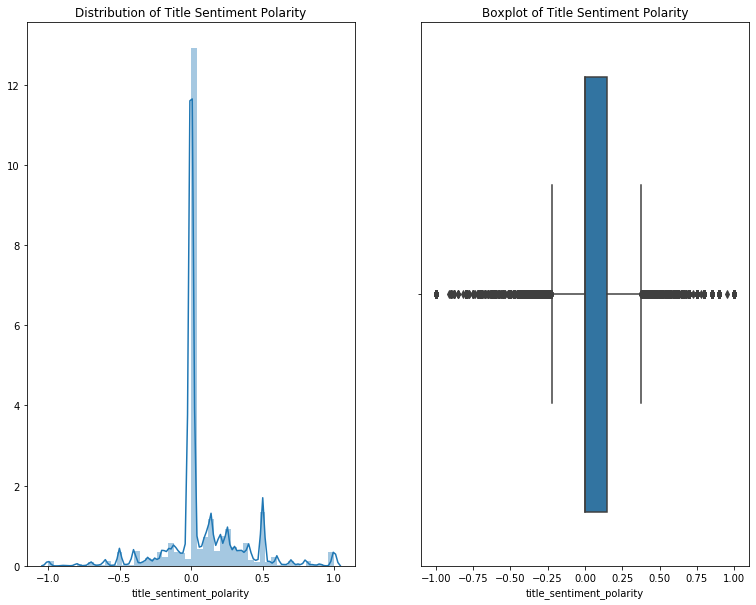

In [211]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.title_sentiment_polarity)
plt.title("Distribution of Title Sentiment Polarity")
plt.subplot(132)
sns.boxplot(data.title_sentiment_polarity)
plt.title("Boxplot of Title Sentiment Polarity")
plt.show()

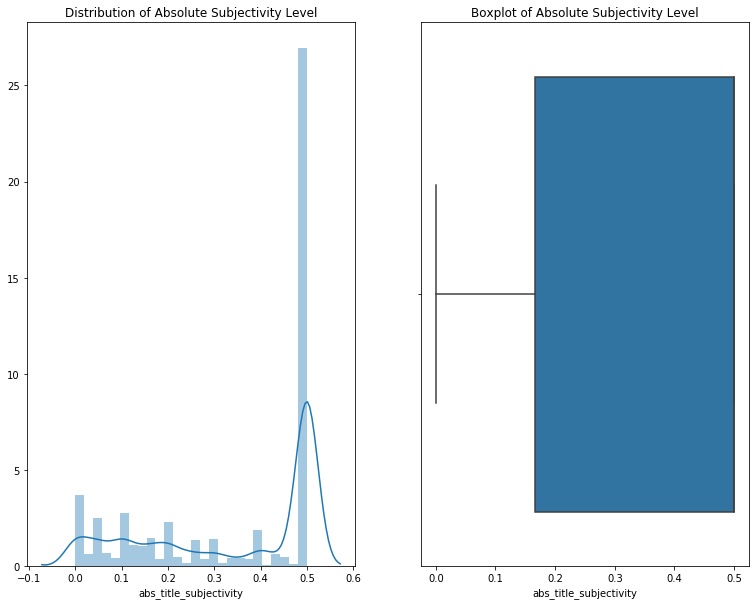

In [212]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.abs_title_subjectivity)
plt.title("Distribution of Absolute Subjectivity Level")
plt.subplot(132)
sns.boxplot(data.abs_title_subjectivity)
plt.title("Boxplot of Absolute Subjectivity Level")
plt.show()

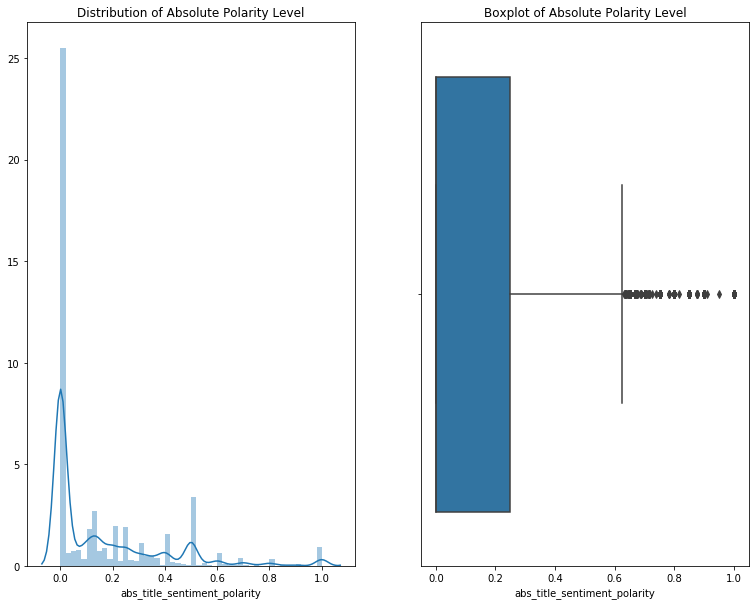

In [213]:
plt.figure(figsize=[20,10])
plt.subplot(131)
sns.distplot(data.abs_title_sentiment_polarity)
plt.title("Distribution of Absolute Polarity Level")
plt.subplot(132)
sns.boxplot(data.abs_title_sentiment_polarity)
plt.title("Boxplot of Absolute Polarity Level")
plt.show()

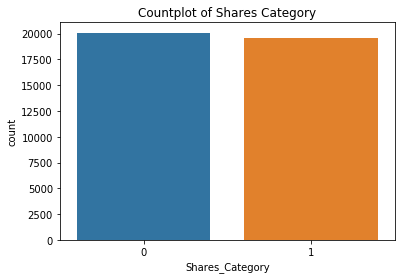

0    20082
1    19562
Name: Shares_Category, dtype: int64


In [171]:
sns.countplot(data.Shares_Category)
plt.title("Countplot of Shares Category")
plt.show()
print(data.Shares_Category.value_counts())

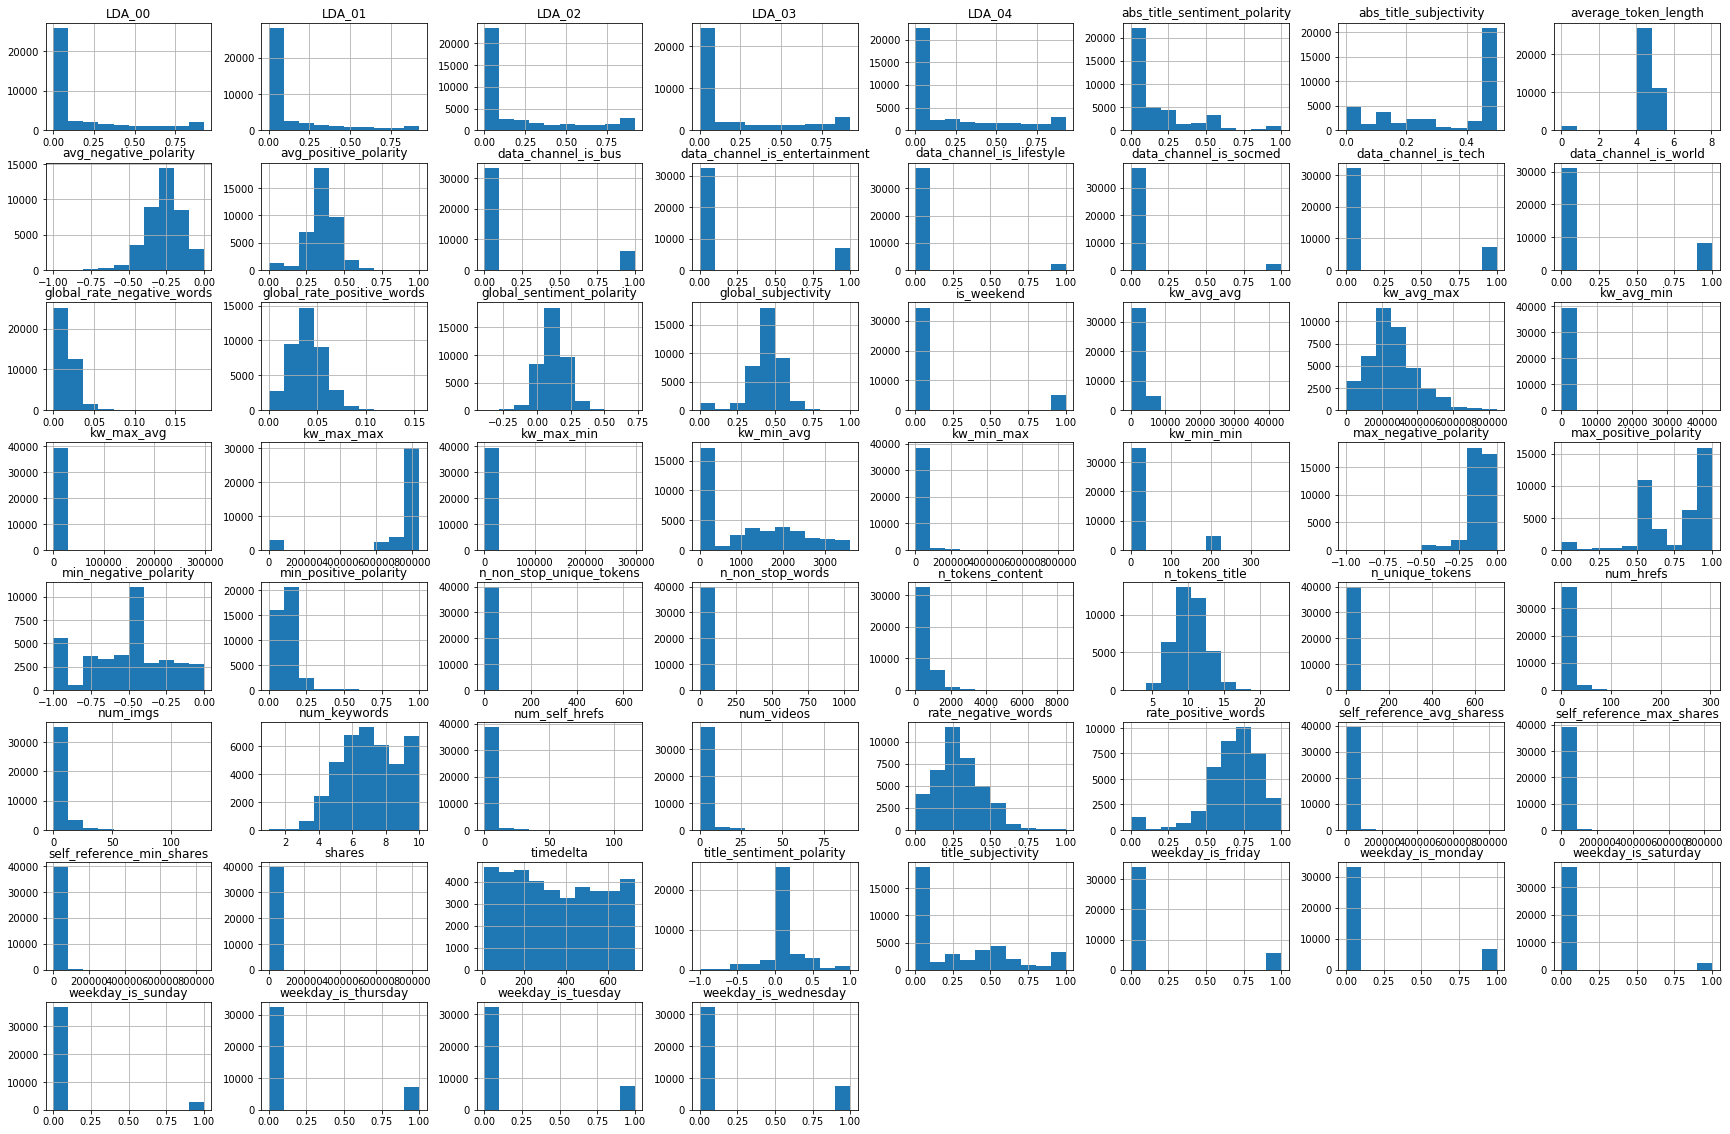

<Figure size 432x288 with 0 Axes>

In [122]:
data.hist(figsize=[30,20])
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

In [168]:
data.skew() # To check the skewness of each column

n_tokens_title                     0.165320
n_tokens_content                   2.945422
n_unique_tokens                  198.655116
n_non_stop_words                 198.792445
n_non_stop_unique_tokens         198.443294
num_hrefs                          4.013495
num_self_hrefs                     5.172751
num_imgs                           3.946596
num_videos                         7.019533
average_token_length              -4.576012
num_keywords                      -0.147251
data_channel_is_lifestyle          3.993019
data_channel_is_entertainment      1.683585
data_channel_is_bus                1.876870
data_channel_is_socmed             3.758880
data_channel_is_tech               1.619976
data_channel_is_world              1.405169
kw_min_min                         2.374947
kw_max_min                        35.328434
kw_avg_min                        31.306108
kw_min_max                        10.386372
kw_max_max                        -2.644982
kw_avg_max                      

In [169]:
data.kurtosis() # To check the peakedness(kurtosis) of each column

n_tokens_title                      -0.000750
n_tokens_content                    19.478412
n_unique_tokens                  39523.832001
n_non_stop_words                 39560.294950
n_non_stop_unique_tokens         39467.693708
num_hrefs                           35.506333
num_self_hrefs                      56.171456
num_imgs                            24.525746
num_videos                          74.075414
average_token_length                22.180450
num_keywords                        -0.805897
data_channel_is_lifestyle           13.944905
data_channel_is_entertainment        0.834500
data_channel_is_bus                  1.522719
data_channel_is_socmed              12.129788
data_channel_is_tech                 0.624353
data_channel_is_world               -0.025500
kw_min_min                           3.660003
kw_max_min                        2100.070758
kw_avg_min                        1592.244353
kw_min_max                         123.432109
kw_max_max                        

### Q4B. Apply correlation plot and display with colour code and numerical indication

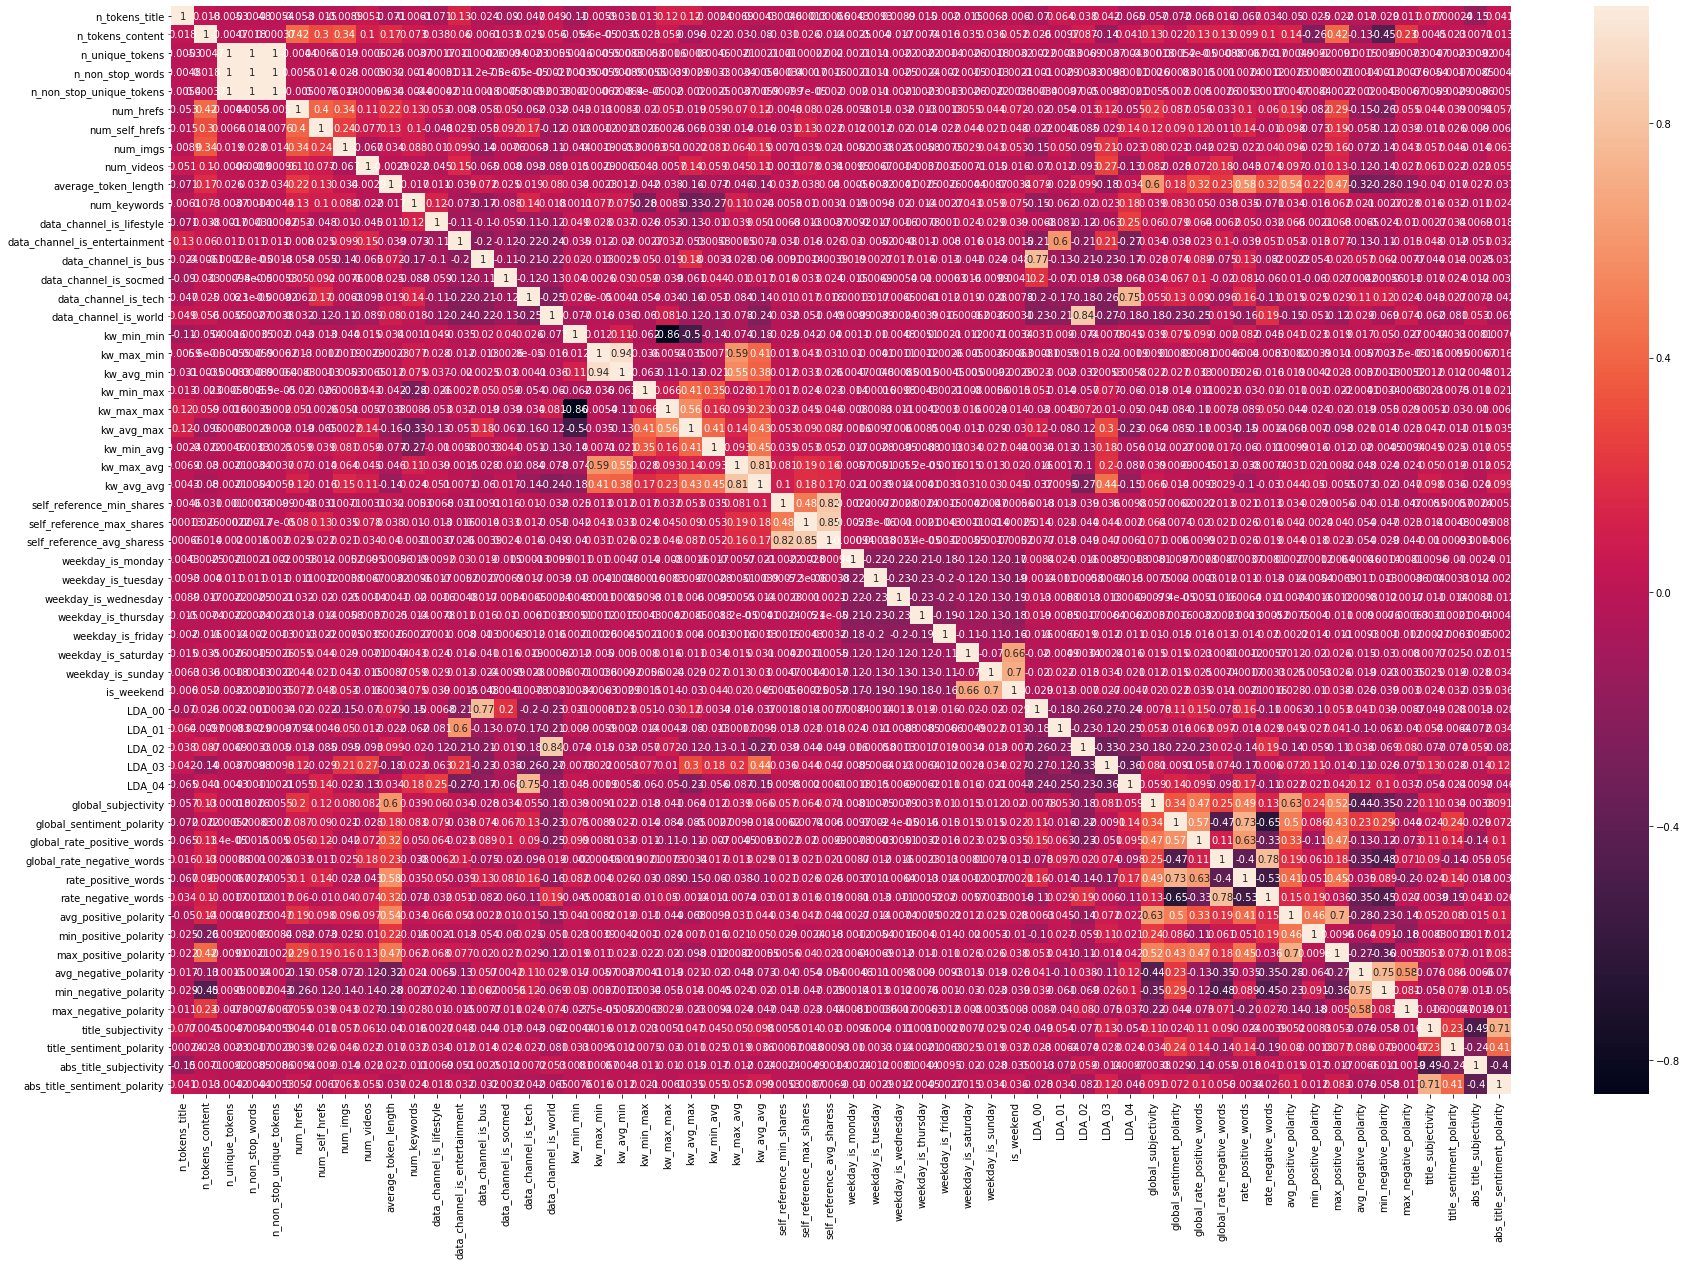

In [172]:
plt.figure(figsize=[30,20])
sns.heatmap(data.corr(),annot=True)
plt.show()

### Q4C. Plot best X with Y and find how the Y is varying with X. Like if X is continuous, go for scatter plot. if X is categorical, go for box plot.

For Numerical vs Numerical - Scatterplot

For Categorical vs Numerical - Boxplot | Violinplot

For Categorical vs Categorical - pd.crosstab | Table | Barplot

### Q5. Write detailed inference (not observations) about the question 4, few pointers like Outlier detection, outlier treatment, conditions for linearity, impact because of transformation on variables, distributions etc.

In [130]:
num_columns = df.columns[df.dtypes.isin(["float64","int64"])]

In [141]:
pd.DataFrame({"Columns":num_columns, "Before Transformation":df[num_columns].skew().values,
              "After Transformation":np.power(df[num_columns],1/5).skew().values}).sort_values("Before Transformation")

C:\Users\Toshiba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


,Columns,Before Transformation,After Transformation
31,max_negative_polarity,-3.459747,0.000000
24,rate_positive_words,-1.423106,-4.886488
20,global_subjectivity,-1.372689,-5.084402
28,max_positive_polarity,-0.939756,-4.556839
26,avg_positive_polarity,-0.724795,-4.851322
34,abs_title_subjectivity,-0.624149,-2.346693
29,avg_negative_polarity,-0.551644,0.000000
46,num_keywords,-0.115467,-0.562942
30,min_negative_polarity,-0.073155,0.000000
40,n_non_stop_unique_tokens,-0.067612,-0.392905


I have made a copy of the original dataset to perform the outliers question. To show the number of outliers present in the dataset in each column, I have taken out the outliers through Inter-Quartile Range and converted them into null values so that it is easy to visualise how many outliers are present in the dataset in each column. The highest number of outliers are in num_imgs and kw_max_max columns.

For Numerical Columns I created distplots(to visualise the distribution of the feature) and boxplots(to visualise the outliers). For Categorical Columns I created Countplots as there is no point in showing distplots for them. 

For looking at the distributions of the features, we made distplots and we took out the skewness of each column. The most highly positively skewed attributes are n_unique_tokens, n_non_stop_words and n_non_stop_unique_tokens of around 198.
The most negatively skewed attribute is average_token_length with a skewness of -4 approximately.

I created a dataframe with with the original skewness and skewness after the transformation. I tried several transformations, and log transformation worked for some attributes and some worked by square root transformation and some by cube root and some by the power of 5.

As it is a classification problem, we are not going to check for the conditions of linearity. If it was a regression problem, we would have done a raindbow test on the model to check if the dataset is linear or not.

### Q7. Check conditions for data imputation and data imbalance for the given dataset. Handling data imputation if needed and balance the data (Either go for under sampling or smote). If not, then explain why you do not need sampling.

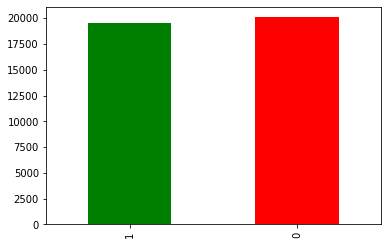

In [176]:
data.Shares_Category.value_counts().sort_values().plot(kind="bar",color=["green","red"])

In [177]:
data.Shares_Category.value_counts() # Numerical Count of the target column.

0    20082
1    19562
Name: Shares_Category, dtype: int64

In [181]:
(data.Shares_Category.value_counts()/data.Shares_Category.count())*100 # Percentage Wise

0    50.655837
1    49.344163
Name: Shares_Category, dtype: float64

As we can see above that the target column of the data is balanced out. There are 20082 values in the (0 Class - Unpopular) and there are 19562 values in the (1 Class - Popular). The target is balanced out in a ratio of 50.65:49.344(0:1 classes respectively in the ratio).

The three most used techniques to deal with imbalanced data are over-sampling,down-sampling sampling and smote. We tend to use such techniques when the data is highly imbalanced (in a ratio of class such as 70:30 or 80:20). These techniques are for increasing the number of values in the dataset in a balanced way and is done through the algorithm KNN (K-Nearest Neighbors).

We wont be applying any of these techniques as there is no need for it as our target column is already balanced.

### Q8. Build multiple models by using feature selection and feature engineering and identify which is the good model and write the inference

I am going to be making two models on the basis of Feature Selection - Random Forest Classifier after applying the feature importances function & Logistic Regression Model on the basis of Logit Model (Backward Elimination).

I am going to split the dataset again and then going to apply Standard Scalar to our model to apply the scaled train and scaled test on the ensemble models.

In [192]:
X = data.drop("Shares_Category",axis=1)
Y = data.Shares_Category
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(X,Y,random_state=0,test_size=0.2)
print("xtrain shape: ",XTRAIN.shape)
print("xtest shape: ",XTEST.shape)
print("ytrain shape: ",YTRAIN.shape)
print("ytest shape: ",YTEST.shape)

xtrain shape:  (31715, 58)
xtest shape:  (7929, 58)
ytrain shape:  (31715,)
ytest shape:  (7929,)


In [193]:
ss = StandardScaler()

In [194]:
XTRAIN_SCALED=ss.fit_transform(XTRAIN)

In [195]:
XTEST_SCALED = ss.transform(XTEST)

In [196]:
rfc = RandomForestClassifier(random_state=123)

In [197]:
predict_rfc = rfc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [198]:
classificationreport = classification_report(YTEST,predict_rfc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.61      0.71      0.66      4055
           1       0.63      0.53      0.58      3874

    accuracy                           0.62      7929
   macro avg       0.62      0.62      0.62      7929
weighted avg       0.62      0.62      0.62      7929



In [199]:
accuracy = accuracy_score(YTEST,predict_rfc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6198764030773112


In [201]:
TRAINING_ACCURACY = rfc.score(XTRAIN_SCALED,YTRAIN)
TESTING_ACCURACY = rfc.score(XTEST_SCALED,YTEST)
print("Training Accuracy is:",TRAINING_ACCURACY)
print("Testing Accuracy is:",TESTING_ACCURACY)

Training Accuracy is: 0.9853066372379
Testing Accuracy is: 0.6198764030773112


In [215]:
rfc_fi = pd.DataFrame({"Columns":X.columns,"Feature_Importance_RFC":(rfc.feature_importances_)*100})

In [222]:
rfc_fi[rfc_fi.Feature_Importance_RFC>3] # Keeping attributes above 2%

,Columns,Feature_Importance_RFC
24,kw_max_avg,4.252467
25,kw_avg_avg,4.579747
26,self_reference_min_shares,3.154934
39,LDA_02,3.153717


Making a model with the attributes which are giving more than 3 % of feature importance according to random forest classifiers function.

In [224]:
XX = data.drop(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'Shares_Category'],axis=1)
YY = data.Shares_Category
XTRAINX,XTESTX,YTRAINY,YTESTY = train_test_split(XX,YY,random_state=0,test_size=0.2)
print("xtrain shape: ",XTRAINX.shape)
print("xtest shape: ",XTESTX.shape)
print("ytrain shape: ",YTRAINY.shape)
print("ytest shape: ",YTESTY.shape)

xtrain shape:  (31715, 4)
xtest shape:  (7929, 4)
ytrain shape:  (31715,)
ytest shape:  (7929,)


In [225]:
RFCFI = RandomForestClassifier(random_state=123)

In [226]:
RFCFI_PREDICT = RFCFI.fit(XTRAINX,YTRAINY).predict(XTESTX)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [299]:
print(classification_report(YTESTY,RFCFI_PREDICT))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61      4055
           1       0.57      0.49      0.53      3874

    accuracy                           0.57      7929
   macro avg       0.57      0.57      0.57      7929
weighted avg       0.57      0.57      0.57      7929



In [227]:
accuracy_score(YTESTY,RFCFI_PREDICT)

0.5711943498549628

In [297]:
cohen_kappa_score(YTESTY,RFCFI_PREDICT)

0.139174321845844

Making a Logistic Regression Model on the basis of backward elimination feature selection

In [230]:
new_data = data.copy()
new_data["constant"] = 1

In [231]:
X = new_data.drop("Shares_Category",axis=1)
Y = new_data.Shares_Category

In [232]:
logit_model = sm.Logit(endog=Y,exog=X.drop(["n_tokens_title","n_unique_tokens","num_imgs","num_videos","n_non_stop_words","data_channel_is_world","self_reference_max_shares","self_reference_min_shares","weekday_is_saturday","weekday_is_monday","weekday_is_thursday","LDA_00","global_sentiment_polarity","global_sentiment_polarity","global_rate_negative_words","n_non_stop_unique_tokens","rate_positive_words","avg_positive_polarity","max_positive_polarity","max_positive_polarity","avg_negative_polarity","max_negative_polarity","min_negative_polarity","abs_title_sentiment_polarity"],axis=1),data=new_data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.628563
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Shares_Category   No. Observations:                39644
Model:                          Logit   Df Residuals:                    39607
Method:                           MLE   Df Model:                           36
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                 0.09306
Time:                        13:29:39   Log-Likelihood:                -24919.
converged:                       True   LL-Null:                       -27476.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_content                  0.0002   2.88e-05      7.624      0.000       0.000       0.000
num_hrefs                         0.0084      0.001      6.701      0.000       0.006       0.011
num_self_hrefs                   -0.0209      0.003     -6.308      0.000      -0.027      -0.014
average_token_length             -0.0910      0.019     -4.749      0.000      -0.129      -0.053
num_keywords                      0.0382      0.007      5.528      0.000       0.025       0.052
data_channel_is_lifestyle        -0.1674      0.062     -2.696      0.007      -0.289      -0.046
data_channel_is_entertainment    -0.3139      0.041     -7.586      0.000      -0.395      -0.233
data_channel_is_bus              -0.2643      0.059     -4.465      0.000      -0.380      -0.148
data_channel_is_socmed            0.7568      0.059     12.884      0.000       0.642       0.872
data_channel_is_tech              0.4658      0.052      8.940      0.000       0.364       0.568
kw_min_min                        0.0017      0.000      5.533      0.000       0.001       0.002
kw_max_min                     2.763e-05   1.15e-05      2.399      0.016    5.06e-06    5.02e-05
kw_avg_min                       -0.0002   7.34e-05     -2.707      0.007      -0.000   -5.48e-05
kw_min_max                    -5.355e-07   2.13e-07     -2.511      0.012   -9.53e-07   -1.18e-07
kw_max_max                    -3.511e-07   1.08e-07     -3.259      0.001   -5.62e-07    -1.4e-07
kw_avg_max                    -6.638e-07   1.52e-07     -4.371      0.000   -9.62e-07   -3.66e-07
kw_min_avg                    -8.764e-05   1.44e-05     -6.105      0.000      -0.000   -5.95e-05
kw_max_avg                    -8.863e-05   4.96e-06    -17.854      0.000   -9.84e-05   -7.89e-05
kw_avg_avg                        0.0007   2.82e-05     25.347      0.000       0.001       0.001
self_reference_avg_sharess     4.504e-06   6.69e-07      6.733      0.000    3.19e-06    5.81e-06
weekday_is_tuesday               -0.0917      0.031     -3.002      0.003      -0.152      -0.032
weekday_is_wednesday             -0.0913      0.031     -2.993      0.003      -0.151      -0.032
weekday_is_friday                 0.1386      0.033      4.162      0.000       0.073       0.204
weekday_is_sunday                -0.2233      0.063     -3.559      0.000      -0.346      -0.100
is_weekend                        0.9356      0.050     18.706      0.000       0.838       1.034
LDA_01                           -1.1026      0.095    -11.568      0.000      -1.289      -0.916
LDA_02                           -1.2531      0.089    -14.143      0.000      -1.427      -1.079
LDA_03                           -1.0652      0.089    -12.028      0.000      -1.239      -0.892
LDA_04                           -0.5870      0.085     -6.914      0.000      -0.753      -0.421
global_subjectivity               0.9484      0.136      6.977      0.000       0.682       1.215
global_

In [234]:
XX = data.drop(["n_tokens_title","n_unique_tokens","num_imgs","num_videos","n_non_stop_words","data_channel_is_world","self_reference_max_shares","self_reference_min_shares","weekday_is_saturday","weekday_is_monday","weekday_is_thursday","LDA_00","global_sentiment_polarity","global_sentiment_polarity","global_rate_negative_words","n_non_stop_unique_tokens","rate_positive_words","avg_positive_polarity","max_positive_polarity","max_positive_polarity","avg_negative_polarity","max_negative_polarity","min_negative_polarity","abs_title_sentiment_polarity"],axis=1)
YY = data.Shares_Category

In [235]:
XXTRAIN,XXTEST,YYTRAIN,YYTEST = train_test_split(XX,YY,random_state=123,test_size=0.2)

In [236]:
Logistic = LogisticRegression()

In [237]:
Logistic_Prediction = Logistic.fit(XXTRAIN,YYTRAIN).predict(XXTEST)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [240]:
print(classification_report(YYTEST,Logistic_Prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3978
           1       1.00      1.00      1.00      3951

    accuracy                           1.00      7929
   macro avg       1.00      1.00      1.00      7929
weighted avg       1.00      1.00      1.00      7929



In [301]:
cohen_kappa_score(YYTEST,Logistic_Prediction)

0.9967208965612218

In [242]:
TRAINING_ACCURACY = Logistic.score(XXTRAIN,YYTRAIN)
TESTING_ACCURACY = Logistic.score(XXTEST,YYTEST)
print("Training Accuracy is:",TRAINING_ACCURACY)
print("Testing Accuracy is:",TESTING_ACCURACY)

Training Accuracy is: 0.9982973356455935
Testing Accuracy is: 0.9983604489847395


After performing feature importances, we see that the logistic regression model is over-fitting and the random forest model is showing high training accuracy and low testing accuracy.

### Q9. Build a classification model (logistic, decision tree, KNN, Naïve Bayes) and calculate the metric and write inference on all the model and describe which model is very good 

In [243]:
X = data.drop("Shares_Category",axis=1)
Y = data.Shares_Category
XTRAIN,XTEST,YTRAIN,YTEST = train_test_split(X,Y,random_state=0,test_size=0.2)
print("xtrain shape: ",XTRAIN.shape)
print("xtest shape: ",XTEST.shape)
print("ytrain shape: ",YTRAIN.shape)
print("ytest shape: ",YTEST.shape)

xtrain shape:  (31715, 58)
xtest shape:  (7929, 58)
ytrain shape:  (31715,)
ytest shape:  (7929,)


In [244]:
ss = StandardScaler()

In [245]:
XTRAIN_SCALED = ss.fit_transform(XTRAIN)
XTEST_SCALED = ss.transform(XTEST)

#### LOGISTIC REGRESSION MODEL

In [247]:
logreg = LogisticRegression()
predict_logreg = logreg.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [248]:
classificationreport = classification_report(YTEST,predict_logreg)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.65      0.67      0.66      4055
           1       0.64      0.63      0.63      3874

    accuracy                           0.65      7929
   macro avg       0.65      0.65      0.65      7929
weighted avg       0.65      0.65      0.65      7929



In [249]:
accuracy = accuracy_score(YTEST,predict_logreg)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6481271282633371


In [250]:
confusion_matrix(YTEST,predict_logreg)

array([[2717, 1338],
       [1452, 2422]], dtype=int64)

In [285]:
cohen_kappa_score(YTEST,predict_logreg)

0.2954246111140165

#### DECISION TREE

In [251]:
dtc = DecisionTreeClassifier()
predict_dtc = dtc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [252]:
classificationreport = classification_report(YTEST,predict_dtc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.59      0.59      0.59      4055
           1       0.57      0.57      0.57      3874

    accuracy                           0.58      7929
   macro avg       0.58      0.58      0.58      7929
weighted avg       0.58      0.58      0.58      7929



In [253]:
accuracy = accuracy_score(YTEST,predict_dtc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.5788876276958003


In [254]:
confusion_matrix(YTEST,predict_dtc)

array([[2381, 1674],
       [1665, 2209]], dtype=int64)

In [284]:
cohen_kappa_score(YTEST,predict_dtc)

0.15737983305988024

#### KNN MODEL

In [275]:
knn = KNeighborsClassifier(n_neighbors=5)

In [276]:
predict_knn = knn.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [277]:
classificationreport = classification_report(YTEST,predict_knn)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.61      0.65      0.63      4055
           1       0.61      0.56      0.58      3874

    accuracy                           0.61      7929
   macro avg       0.61      0.61      0.61      7929
weighted avg       0.61      0.61      0.61      7929



In [278]:
accuracy = accuracy_score(YTEST,predict_knn)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.60701223357296


In [279]:
confusion_matrix(YTEST,predict_knn)

array([[2639, 1416],
       [1700, 2174]], dtype=int64)

In [283]:
cohen_kappa_score(YTEST,predict_knn)

0.2123259493751598

#### NAIVE BAYES MODEL

In [267]:
GNB = GaussianNB()

In [268]:
predict_gnb = GNB.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [269]:
classificationreport = classification_report(YTEST,predict_gnb)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.59      0.80      0.68      4055
           1       0.66      0.41      0.51      3874

    accuracy                           0.61      7929
   macro avg       0.62      0.60      0.59      7929
weighted avg       0.62      0.61      0.59      7929



In [271]:
accuracy = accuracy_score(YTEST,predict_gnb)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6087779038970866


In [272]:
confusion_matrix(YTEST,predict_gnb)

array([[3232,  823],
       [2279, 1595]], dtype=int64)

In [282]:
cohen_kappa_score(YTEST,predict_gnb)

0.2105257380257506

The least predictive accuracy achieved by the above models was of approximately 58% by Decision Tree Classifier and the best among the above were by logistic regression of approximately 65%. The kappa score is also the highest of logistic regression of 29.542 approximately. Kappa is an important measure on classifier performance. The cohen kappa score is a measure of how closely the data points which are classified by the classifier are matched to the data in original data. Cohen kappa score metric doesnt show biasness towards any imbalancing seen in data(if any, not in this case).

### Q10. Apply ensemble techniques (at least 2) to build model and write inference on the same

#### GRADIENT BOOSTING CLASSIFIER

In [259]:
gbc = GradientBoostingClassifier(random_state=123)
predict_gbc = gbc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [260]:
classificationreport = classification_report(YTEST,predict_gbc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.67      0.68      0.67      4055
           1       0.66      0.66      0.66      3874

    accuracy                           0.67      7929
   macro avg       0.67      0.67      0.67      7929
weighted avg       0.67      0.67      0.67      7929



In [261]:
accuracy = accuracy_score(YTEST,predict_gbc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6656577121957372


In [262]:
confusion_matrix(YTEST,predict_gbc)

array([[2738, 1317],
       [1334, 2540]], dtype=int64)

In [280]:
cohen_kappa_score(YTEST,predict_gbc)

0.3309012622384363

#### XGBOOSTING CLASSIFER

In [263]:
xgbc = XGBClassifier(random_state=123)
predict_xgbc = xgbc.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [264]:
classificationreport = classification_report(YTEST,predict_xgbc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.67      0.68      0.67      4055
           1       0.66      0.65      0.65      3874

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [265]:
accuracy = accuracy_score(YTEST,predict_xgbc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6637659225627444


In [292]:
confusion_matrix(YTEST,predict_xgbc)

array([[2751, 1304],
       [1362, 2512]], dtype=int64)

In [293]:
cohen_kappa_score(YTEST,predict_xgbc)

0.32695635030480796

Among these two boosting classifiers, the kappa score is more or less the same. The accuracy it has also a little better of gradient boosting by 0.4 percent if we compare it with xgboost classifier. Boosting techniques have always been known to show better predictive accuracies than bagging and other ensemble models.

There are major benefits of Ensemble models over all the other models applied on this dataset or any datset: Better prediction(accuracy), More stable model and there is bias-variance trade off.

### Q11. Display the output in tabular format, which will compare all the model, model tuning methods, metrics. Compare all the models create and write detailed summary on the Final model and why is this best model, enrich with the factor why it is best model based on what? (e.g. EDA inference, transformation, feature selection etc.) 

#### Grid Search - Gradient Boosting Classifier

In [286]:
GBC = GradientBoostingClassifier(random_state=123)

In [287]:
params = {"min_samples_split": np.linspace(0.1,0.5,1,6),"min_samples_leaf": np.linspace(0.1,0.5,1,6),
          "max_features":["log2","sqrt"],'max_depth': [2,3,4,5,6,9]}
Grid_GBC = GridSearchCV(GBC, cv = 5,param_grid=params)
Grid_GBC.fit(XTRAIN_SCALED,YTRAIN)
print('Best Parameters using grid search:', Grid_GBC.best_params_)

Best Parameters using grid search: {'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


#### MODEL AFTER GRID SEARCH

In [288]:
GBC = GradientBoostingClassifier(random_state=123,max_depth= 6, max_features= 'sqrt', min_samples_leaf= 0.1, min_samples_split= 0.1)
predict_gbc = GBC.fit(XTRAIN_SCALED,YTRAIN).predict(XTEST_SCALED)

In [290]:
classificationreport = classification_report(YTEST,predict_gbc)
print("Classification Report is:",classificationreport)

Classification Report is:               precision    recall  f1-score   support

           0       0.67      0.66      0.67      4055
           1       0.65      0.67      0.66      3874

    accuracy                           0.66      7929
   macro avg       0.66      0.66      0.66      7929
weighted avg       0.66      0.66      0.66      7929



In [291]:
accuracy = accuracy_score(YTEST,predict_gbc)
print("Accuracy Score is:",accuracy)

Accuracy Score is: 0.6614957750031529


In [295]:
confusion_matrix(YTEST,predict_gbc)

array([[2664, 1391],
       [1293, 2581]], dtype=int64)

In [296]:
cohen_kappa_score(YTEST,predict_gbc)

0.32302078535869105

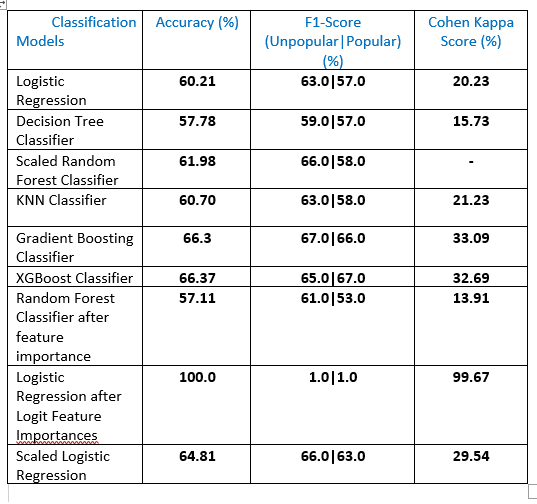

The best model one the basis of the metrics is Gradient Boosting Classifier after doing grid search and finding the most optimal parameters to get the best accuracies.